<h1><center>Telecom Churn Analysis and Prediction</center></h1>

<div style="text-align: right"> Submitted By: Kashif Sami & Ravi Dhir

# Table of Contents

**[Business Understanding](#1)**
   - [Business Objective](#1.1)
   - [Definition of Churn](#1.2)
   
**[Data Understanding & Cleaning](#2)**
  - [Import Libraries & Configure Notebook](#2.1)
  - [Import & Review Data](#2.2)
  - [Filter Out High Value Customer](#2.3)
  - [Label Churned Customers](#2.4)
  - [Delete Churned Phase data](#2.5)
  - [Columns With One Value Only](#2.6)
  - [Columns With Many Null values](#2.7)
  - [Columns With Mostly Zeroes](#2.8)
  - [Delete Unnecessary Columns](#2.9) 
  
**[Data Analysis & Preparation](#3)**
  - [Time Gap Between Recharges](#3.1)
  - [Attribute Relationships & Collinearity Analysis](#3.2) 
  - [Outliers](#3.3)
  - [Analyze Target Variable](#3.4)
  - [Bivariate Analysis](#3.5)
  - [Train-Test Split](#3.6)
  - [Rescale Variables](#3.7)
  - [Class Imbalance](#3.8)

  
**[Model Building & Evaluation](#4)**
   - [Logistic Regression Models](#4.1)
      - [Class Balancing & Baseline Model](#4.1.1)
      - [Optimum Probability Threshold](#4.1.1)
      - [Dimensionality Reduction with PCA](#4.1.2)
      - [Hyperparameter tuning](#4.1.3)
      - [Generalized Regression using Polynomial Features](#4.1.4)
      
   - [Decision Tree Models](#4.2)
      - [DT - Basic Model](#4.2.1)
      - [DT - Hyperparameter Tuning ](#4.2.2)
      - [Random Forests - Basic Model](#4.2.3)
      - [Random Forests - Hyperparameter Tuning](#4.2.4)
      
   - [Support Vector Machine Models](#4.3)
      - [Basic Model](#4.3.1)
      - [Hyperparameter Tuning](#4.3.2)
      
   - [XGBoost Models](#4.4)
      - [Basic Model](#4.4.1)
      - [Hyperparameter Tuning](#4.4.2)
      
   - [Model for Drivers Analysis](#4.5)
   - [Conclusion on Modelling](#4.6)

**[Business Presentation](#5)**
   - [Drivers of Churn](#5.1)
   - [Recommendations](#5.2)
 
**[References](#6)**



<a id="1"></a>
# Business Understanding

<a id="1.1"></a>
## Business Objective

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

Threfore, the goal of this project is to build a predictive model to predict which customers are likely to churn and to identify the main indicators of churn.

<a id="1.2"></a>
## Definition of Churn

There are various ways to define churn, such as:

**Revenue-based churn**: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

 

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

 

**Usage-based churn**: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

 

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

 

In this project, we will use the usage-based definition to define churn.

<a id="2"></a>
# Data Understanding & Cleaning

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. The objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. 

<a id="2.1"></a>
## Import Libraries & Configure Notebook

In [41]:
#Core libraries
import numpy as np
import pandas as pd

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz


#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

#Modelling
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import Lasso
# from sklearn.linear_model import Ridge
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# from sklearn.feature_selection import RFE
# from statsmodels.stats.outliers_influence import variance_inflation_factor #For multicollinearity
from sklearn.decomposition import PCA, IncrementalPCA
# import xgboost as xgb
from xgboost import XGBClassifier
# from xgboost import plot_importance

#Model selection and evaluation tools
from sklearn.metrics import auc, roc_auc_score,roc_curve,f1_score,precision_recall_curve,classification_report, confusion_matrix,accuracy_score
# from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [42]:
#Configure notebook

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Set Parameters for Displaying data
pd.options.display.max_info_columns = 300
pd.set_option('display.max_columns', 120)
pd.options.display.max_rows = 300

np.set_printoptions(suppress=True)
pd.options.display.float_format = '{:.4f}'.format

# #InteractiveShell.ast_node_interactivity = "all"
sns.set_style("whitegrid")
%matplotlib inline


# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

<a id="2.2"></a>
## Import & Review Data

In [43]:
#Import data
data = pd.read_csv('telecom_churn_data.csv')

In [44]:
data.shape
data.head(10)

(99999, 226)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,...,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0000,0.0000,0.0000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.3850,214.8160,213.8030,21.1000,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,...,252.0000,252.0000,nan,0.0000,0.0000,0.0000,nan,1.0000,1.0000,1.0000,nan,252.0000,252.0000,252.0000,nan,30.1300,1.3200,5.7500,0.0000,83.5700,150.7600,109.6100,0.0000,212.1700,212.1700,212.1700,nan,212.1700,212.1700,212.1700,nan,0.0000,0.0000,0.0000,nan,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0000,1.0000,1.0000,nan,968,30.4000,0.0000,101.2000,3.5800
1,7001865778,109,0.0000,0.0000,0.0000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.0470,355.0740,268.3210,86.2850,24.1100,78.6800,7.6800,18.3400,15.7400,99.8400,304.7600,53.7600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,23.8800,74.5600,7.6800,18.3400,11.5100,75.9400,291.8600,53.7600,0.0000,0.0000,0.0000,0.0000,0.0000,2.9100,0.0000,0.0000,35.3900,150.5100,299.5400,72.1100,0.2300,4.1100,0.0000,0.0000,0.0000,0.4600,0.1300,0.0000,0.0000,0.0000,0.0000,...,154.0000,25.0000,nan,nan,1.0000,2.0000,nan,nan,0.0000,0.0000,nan,nan,154.0000,50.0000,nan,0.0000,108.0700,365.4700,0.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.0000,nan,nan,28.6100,7.6000,nan,nan,0.0000,0.0000,nan,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,nan,1.0000,1.0000,nan,1006,0.0000,0.0000,0.0000,0.0000
2,7001625959,109,0.0000,0.0000,0.0000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.6900,189.0580,210.2260,290.7140,11.5400,55.2400,37.2600,74.8100,143.3300,220.5900,208.3600,118.9100,0.0000,0.0000,0.0000,38.4900,0.0000,0.0000,0.0000,70.9400,7.1900,28.7400,13.5800,14.3900,29.3400,16.8600,38.4600,28.1600,24.1100,21.7900,15.6100,22.2400,0.0000,135.5400,45.7600,0.4800,60.6600,67.4100,67.6600,64.8100,4.3400,26.4900,22.5800,8.7600,41.8100,67.4100,75.5300,9.2800,1.4800,14.7600,22.8300,...,nan,nan,46.0000,nan,nan,nan,1.0000,nan,nan,nan,0.0000,nan,nan,nan,46.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.4200,nan,nan,nan,2.8400,nan,nan,nan,0.0000,nan,nan,nan,0.0000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,nan,nan,nan,1.0000,1103,0.0000,0.0000,4.1700,0.0000
3,7001204172,109,0.0000,0.0000,0.0000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.3380,251.102

In [45]:
#Is userID unique?
data['mobile_number'].nunique()

99999

> **Observation:** Each row in the csv file represents a customer with a unique phone number. 

<a id="2.3"></a>
## Filter Out High Value Customers
Filter out customers with less then 70 percentile of average recharge amount so we can focus on churn of high-value customers only

In [46]:
#Average recharge amount for months 6 & 7 
data['av_rech_amt_67'] = data[['total_rech_amt_6','total_rech_amt_7']].mean(axis=1)

In [47]:
#70th percentile
data.av_rech_amt_67.quantile(0.7)

368.5

In [48]:
#Filter out customers <70 percentile of average recharge amount
data = data[data.av_rech_amt_67 >368.5]

In [49]:
data.shape

(29979, 227)

> **Observation**: 
- The 70th percentile of average recharge amount in months 6 & 7 is 368.5 local currency.
- There are 29,979 high-value customers

<a id="2.4"></a>
## Label Churned Customers
Create a 'churn' column indicating that a customer has churned if they have not made any calls (incoming & outgoing) and have not used mobile internet even once in month 9. 

In [50]:
#Create column churn, default to 0
data['churn']=0

In [51]:
#Set churn to 1 when data and call usage are zero in month 9
data.loc[(data.total_ic_mou_9==0) & (data.total_og_mou_9==0) & (data.vol_2g_mb_9==0) & (data.vol_3g_mb_9==0),'churn']=1

In [52]:
#Verify churn label
data[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','churn']].head(30)

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,churn
7,0.0000,0.0000,0.0000,0.0000,1
8,34.9100,142.1800,0.0000,0.0000,0
13,631.8600,446.0900,0.0000,0.0000,0
16,334.5600,255.7400,0.0000,0.0000,0
17,87.1300,631.0800,0.0000,0.0000,0
21,252.6100,1031.5300,0.0000,0.0000,0
24,330.0300,627.7800,0.0000,0.0000,0
33,114.1600,1.7000,30.9200,5588.1100,0
38,114.0900,708.0400,0.0000,0.0000,0
41,165.8400,89.1300,0.0000,0.0000,0


<a id="2.5"></a>
## Delete Churned Phase Data
We don't want data from the future (month 9) to be included in our model, so let's delete these columns

In [53]:
data.shape

(29979, 228)

In [54]:
#List of columns for month 9
cols = [c for c in data.columns if '_9' in c]

len(cols) #Number of such columns
cols #Show columns

54

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [55]:
#Drop columns
data.drop(cols, axis=1,inplace=True)

In [56]:
data.shape

(29979, 174)

>**Observation**: There were 54 columns with data pertaining to month 9

<a id="2.6"></a>
## Columns With One Value Only

In [57]:
#Columns with only 1 unique value 
uniks = data.nunique()[data.nunique()==1].sort_values(ascending=True)
uniks

circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
last_date_of_month_6    1
last_date_of_month_7    1
last_date_of_month_8    1
std_og_t2c_mou_6        1
std_og_t2c_mou_7        1
std_og_t2c_mou_8        1
std_ic_t2o_mou_6        1
std_ic_t2o_mou_7        1
std_ic_t2o_mou_8        1
dtype: int64

In [58]:
#Let's see the values
data[[c for c in uniks.index]].head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
7,109,0.0000,0.0000,0.0000,6/30/2014,7/31/2014,8/31/2014,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,109,0.0000,0.0000,0.0000,6/30/2014,7/31/2014,8/31/2014,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
13,109,0.0000,0.0000,0.0000,6/30/2014,7/31/2014,8/31/2014,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
16,109,0.0000,0.0000,0.0000,6/30/2014,7/31/2014,8/31/2014,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
17,109,0.0000,0.0000,0.0000,6/30/2014,7/31/2014,8/31/2014,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


- Let's drop all of these columns as they have no variance. 
- The last date of months 6,7 & 8 maybe useful later for comparison with last recharge dates so noting them down here: 6/30/2014,7/13/2014 and 8/13/2014

In [59]:
#Drop cols
data.drop(columns=uniks.index,inplace=True,axis=1)

In [60]:
#Columns left?
data.shape

(29979, 161)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 161 columns):
mobile_number               29979 non-null int64
arpu_6                      29979 non-null float64
arpu_7                      29979 non-null float64
arpu_8                      29979 non-null float64
onnet_mou_6                 29663 non-null float64
onnet_mou_7                 29676 non-null float64
onnet_mou_8                 29041 non-null float64
offnet_mou_6                29663 non-null float64
offnet_mou_7                29676 non-null float64
offnet_mou_8                29041 non-null float64
roam_ic_mou_6               29663 non-null float64
roam_ic_mou_7               29676 non-null float64
roam_ic_mou_8               29041 non-null float64
roam_og_mou_6               29663 non-null float64
roam_og_mou_7               29676 non-null float64
roam_og_mou_8               29041 non-null float64
loc_og_t2t_mou_6            29663 non-null float64
loc_og_t2t_mou_7         

<a id="2.7"></a>
## Columns With Many Null Values

In [62]:
#How many null values per col?
data.isnull().sum().sort_values(ascending=False)

arpu_3g_6                   18592
fb_user_6                   18592
count_rech_3g_6             18592
count_rech_2g_6             18592
max_rech_data_6             18592
arpu_2g_6                   18592
total_rech_data_6           18592
night_pck_user_6            18592
date_of_last_rech_data_6    18592
av_rech_amt_data_6          18592
fb_user_7                   18327
arpu_3g_7                   18327
date_of_last_rech_data_7    18327
night_pck_user_7            18327
total_rech_data_7           18327
count_rech_3g_7             18327
max_rech_data_7             18327
arpu_2g_7                   18327
count_rech_2g_7             18327
av_rech_amt_data_7          18327
count_rech_3g_8             18238
arpu_2g_8                   18238
arpu_3g_8                   18238
max_rech_data_8             18238
night_pck_user_8            18238
count_rech_2g_8             18238
total_rech_data_8           18238
date_of_last_rech_data_8    18238
fb_user_8                   18238
av_rech_amt_da

In [63]:
#Let's get cols with about 60% null values
col_null = data.isnull().sum()[data.isnull().sum()>=0]
col_null.shape
col_null

(161,)

mobile_number                   0
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                   316
onnet_mou_7                   303
onnet_mou_8                   938
offnet_mou_6                  316
offnet_mou_7                  303
offnet_mou_8                  938
roam_ic_mou_6                 316
roam_ic_mou_7                 303
roam_ic_mou_8                 938
roam_og_mou_6                 316
roam_og_mou_7                 303
roam_og_mou_8                 938
loc_og_t2t_mou_6              316
loc_og_t2t_mou_7              303
loc_og_t2t_mou_8              938
loc_og_t2m_mou_6              316
loc_og_t2m_mou_7              303
loc_og_t2m_mou_8              938
loc_og_t2f_mou_6              316
loc_og_t2f_mou_7              303
loc_og_t2f_mou_8              938
loc_og_t2c_mou_6              316
loc_og_t2c_mou_7              303
loc_og_t2c_mou_8              938
loc_og_mou_6                  316
loc_og_mou_7  

In [64]:
[c for c in col_null.index]

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_

In [65]:
#Let's observe the data closely
data[[c for c in col_null.index]].head(30)

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,...,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,av_rech_amt_67,churn
7,7000701601,1069.1800,1349.8500,3171.4800,57.8400,54.6800,52.2900,453.4300,567.1600,325.9100,16.2300,33.4900,31.6400,23.7400,12.5900,38.0600,51.3900,31.3800,40.2800,308.6300,447.3800,162.2800,62.1300,55.1400,53.2300,0.0000,0.0000,0.0000,422.1600,533.9100,255.7900,4.3000,23.2900,12.0100,49.8900,31.7600,49.1400,6.6600,20.0800,16.6800,60.8600,75.1400,77.8400,0.0000,0.1800,10.0100,4.5000,0.0000,6.5000,0.0000,0.0000,0.0000,487.5300,609.2400,350.1600,58.1400,32.2600,27.3100,217.5600,221.4900,...,7/25/2014,8/26/2014,0,0,779,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,802,57.7400,19.3800,18.7400,0.0000,1185.0000,1
8,7001524846,378.7210,492.2230,137.3620,413.6900,351.0300,35.0800,94.6600,80.6300,136.4800,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,297.1300,217.5900,12.4900,80.9600,70.5800,50.5400,0.0000,0.0000,0.0000,0.0000,0.0000,7.1500,378.0900,288.1800,63.0400,116.5600,133.4300,22.5800,13.6900,10.0400,75.6900,0.0000,0.0000,0.0000,130.2600,143.4800,98.2800,0.0000,0.0000,0.0000,0.0000,0.0000,10.2300,0.0000,0.0000,0.0000,508.3600,431.6600,171.5600,23.8400,9.8400,0.3100,57.5800,13.9800,...,7/31/2014,8/30/2014,50,0,10,NaN,7/31/2014,8/23/2014,nan,2.0000,3.0000,nan,154.0000,23.0000,nan,2.0000,3.0000,nan,0.0000,0.0000,nan,177.0000,69.0000,0.0000,356.0000,0.0300,0.0000,750.9500,11.9400,nan,0.0000,19.8300,nan,0.0000,0.0000,nan,0.0000,0.0000,0,1,0,0,1,3,0,0,0,0,0,0,nan,1.0000,1.0000,315,21.0300,910.6500,122.1600,0.0000,519.0000,0
13,7002191713,492.8460,205.6710,593.2600,501.7600,108.3900,534.2400,413.3100,119.2800,482.4600,23.5300,144.2400,72.1100,7.9800,35.2600,1.4400,49.6300,6.1900,36.0100,151.1300,47.2800,294.4600,4.5400,0.0000,23.5100,0.0000,0.0000,0.4900,205.3100,53.4800,353.9900,446.4100,85.9800,498.2300,255.3600,52.9400,156.9400,0.0000,0.0000,0.0000,701.7800,138.9300,655.1800,0.0000,0.0000,1.2900,0.0000,0.0000,4.7800,0.0000,0.0000,0.0000,907.0900,192.4100,1015.2600,67.8800,7.5800,52.5800,142.8800,18.5300,...,7/22/2014,8/30/2014,110,50,0,NaN,NaN,8/30/2014,nan,nan,3.0000,nan,nan,23.0000,nan,nan,3.0000,nan,nan,0.0000,nan,nan,69.0000,0.0000,0.0000,0.0200,0.0000,0.0000,0.0000,nan,nan,0.0000,nan,nan,0

>**Observations & Actions**: 
- About 60% of data is missing in these 30 columns but in a specific pattern such as for all columns related to mobile data utilization - month 6 has 18,592 missing, month 7 has 18,327 and month 8 has 18,238 missing. 
- One possibility is that some of these users who appear to not have done a recharge in all 3 months are postpaid customers but it is also possible that the same users are ones who have bought a recharge pack valid for several months. Another explanation of the pattern is that users are recharging their phones for mobile data usage or using STD etc. for a specific month only and not all 3 months and months for which the serviceis is not used, value is set to NaN. Let's go with the latter assumption as we can not say for sure unless we clarify with the Telecom company.**
- Now, this behavior should definitely be modelled instead of dropping these columns and losing information so let's impute them all with zeroes (except date columns).


>**Important Assumption**: There were some indications in the Upgrad discussion forum and the Q&A session that there are some postpaid customers included in this dataset. I don't see a reliable way to separate them out without probing the Telco further. For example, we only have a mention of 'night packs' which would be 0 both for prepaid and postpaid customers. Also, the reason for the null values as described above is ambiguous too. So let's assume that all customers are prepaid and the best way to handle this assumption is to set all null values to zero as described above.

In [66]:
#Get list of numeric (non-date) columns
numeric_cols = data.select_dtypes(exclude=(object)).columns

In [67]:
#Replace NaN with 0
data[numeric_cols] = data[numeric_cols].fillna(0).copy()

In [68]:
#Verify that no null values are left
data.isnull().sum().sort_values(ascending=False)

date_of_last_rech_data_6    18592
date_of_last_rech_data_7    18327
date_of_last_rech_data_8    18238
date_of_last_rech_8           594
date_of_last_rech_7           114
date_of_last_rech_6            62
loc_ic_t2t_mou_6                0
total_og_mou_7                  0
total_og_mou_6                  0
og_others_8                     0
churn                           0
og_others_7                     0
og_others_6                     0
spl_og_mou_8                    0
spl_og_mou_7                    0
spl_og_mou_6                    0
isd_og_mou_8                    0
isd_og_mou_7                    0
isd_og_mou_6                    0
total_og_mou_8                  0
loc_ic_t2t_mou_7                0
std_og_mou_7                    0
loc_ic_t2t_mou_8                0
std_ic_t2f_mou_7                0
std_ic_t2f_mou_6                0
std_ic_t2m_mou_8                0
std_ic_t2m_mou_7                0
std_ic_t2m_mou_6                0
std_ic_t2t_mou_8                0
std_ic_t2t_mou

>**Observation**: We're left only with null values in the date columns which we'll address later. 

<a id="2.8"></a>
## Columns With Mostly Zeroes

In [69]:
#Number of non-zeroes by columns
data.astype(bool).sum().describe()
data.astype(bool).sum().sort_values()

count     161.0000
mean    16255.8137
std     10544.2772
min       164.0000
25%      7149.0000
50%     15254.0000
75%     27838.0000
max     29979.0000
dtype: float64

og_others_7                   164
og_others_8                   180
night_pck_user_8              279
night_pck_user_7              296
night_pck_user_6              311
spl_ic_mou_7                 1648
sachet_3g_8                  1727
sachet_3g_7                  1957
sachet_3g_6                  1978
isd_og_mou_8                 2098
spl_ic_mou_8                 2416
isd_og_mou_7                 2503
sep_vbc_3g                   2581
churn                        2589
isd_og_mou_6                 2638
monthly_2g_8                 3070
monthly_2g_6                 3328
monthly_2g_7                 3453
monthly_3g_8                 3483
monthly_3g_6                 3578
monthly_3g_7                 3649
std_og_t2f_mou_8             4586
std_og_t2f_mou_7             4864
count_rech_3g_8              4893
std_og_t2f_mou_6             4959
count_rech_3g_6              5177
count_rech_3g_7              5207
sachet_2g_6                  5225
sachet_2g_7                  5454
roam_ic_mou_7 

In [70]:
len(data[data['max_rech_data_8']==0])/len(data)

0.6083591847626671

In [71]:
#List of columns with more than ~60% zeroes
col_zero = data.astype(bool).sum(axis=0)[data.astype(bool).sum(axis=0)<=11741].sort_index()
col_zero.pop('churn') #Churn is expected to have many zeroes so let's not analyze it here
col_zero.shape
pd.DataFrame(col_zero).sort_values(by=0,ascending=True)

2589

(79,)

,0
og_others_7,164
og_others_8,180
night_pck_user_8,279
night_pck_user_7,296
night_pck_user_6,311
spl_ic_mou_7,1648
sachet_3g_8,1727
sachet_3g_7,1957
sachet_3g_6,1978
isd_og_mou_8,2098


In [72]:
#List columns with less than ~60% zeros
col_few_zeroes = data.astype(bool).sum(axis=0)[data.astype(bool).sum(axis=0)>11741].sort_index()
col_few_zeroes.shape
pd.DataFrame(col_few_zeroes).sort_index()

(81,)

,0
aon,29979
arpu_6,29822
arpu_7,29831
arpu_8,29125
av_rech_amt_67,29979
date_of_last_rech_6,29979
date_of_last_rech_7,29979
date_of_last_rech_8,29979
date_of_last_rech_data_6,29979
date_of_last_rech_data_7,29979


In [73]:
#Let's look closer into the columns with many zeroes
data[[c for c in col_zero.index]].head(10)

,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,aug_vbc_3g,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,fb_user_6,fb_user_7,fb_user_8,ic_others_6,ic_others_7,ic_others_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,jul_vbc_3g,jun_vbc_3g,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,og_others_6,og_others_7,og_others_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,sep_vbc_3g,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
7,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,57.7400,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,15.7400,15.1900,15.1400,2.0600,14.5300,31.5900,0.0000,0.1800,10.0100,19.3800,18.7400,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,16.2300,33.4900,31.6400,23.7400,12.5900,38.0600,0,0,0,0,0,0,0.0000,0.2100,0.0000,0.0000,52.1900,34.2400,22.2100,6.6600,20.0800,16.6800,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.0000,0.0000,0.0000,0.0000,0.0000,19.8300,21.0300,0.0000,177.0000,69.0000,0.0000,2.0000,3.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,910.6500,122.1600,0.0000,0.0000,7.1500,0.0000,154.0000,23.0000,0,1,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,1,3,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,3.0000,0.0000,356.0000,0.0300,0.0000,750.9500,11.9400
13,0.0000,0.0000,0.2000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,69.0000,0.0000,0.0000,3.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,83.4800,16.2400,21.4400,245.2800,62.1100,393.3900,0.0000,0.0000,1.2900,0.0000,0.0000,0.0000,0.0000,0.4900,0.0000,0.0000,23.0000,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,23.5300,144.2400,72.1100,7.9800,35.2600,1.4400,0,0,3,0,0,0,0.0000,0.4500,0.0000,0.0000,0.0000,0.0000,1.9100,0.0000,0.0000,0.0000,0.0000,0.0000,3.0000,0.0000,0.0000,0.0200,0.0000,0.0000,0.0000
16,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2300,0.0000,0.0000,0.0000,2.4500,21.8900,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.8300,0.0000,0.0000,17.7400,0.0000,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.5100,0.0000,2.1800,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
17,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.9300,0.0000,0.0000,0.0000,4.7600,4.8100,0.0000,8.4600,13.3400,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
21,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0,0,0.0000,0.0000,0

>**Observations**: The following (sub) services are not utilized by 40% or more customers 
- Mobile data - several columns are related to data including sachet_2G/3G
- Calls - ISD, STD (T2F only), Incoming (Others only), Local Outgoing (T2C only), Roaming & Special (Incoming only)
- Schemes - night packs and VBC (no-scheme)

>**Actions**: 
- Let's get rid of these services from our dataset for now as they may bias our model and possibly revisit them at the time of modelling.
- The columns std_ic_t2t_mou_7, std_og_t2t_mou_6, std_og_t2t_mou_7 did not make it to the list although the same attributes for other months did get included. Therefore, I will add these manually as the 60% zeroes "cut-off" is arbitrary and we want to remove services that are genuinely not utilized.



In [75]:
# #Create list of columns to delete
cols_del = [c for c in col_zero.index]

# #Add some cols
# cols_del.append('std_ic_t2t_mou_7')
# cols_del.append('std_og_t2t_mou_6')
# cols_del.append('std_og_t2t_mou_7')

len(cols_del)
cols_del.sort()
cols_del

79

['arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'aug_vbc_3g',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8'

In [76]:
#Delete columns with many zeroes
data.drop(cols_del,inplace=True,axis=1)

In [77]:
#What's left?
data.shape

(29979, 82)

>**Observation**: We've lost 79 columns that had more than 60% zeroes

<a id="2.9"></a>
## Delete Unneecessary Columns

>**Note**: As per case study instructions, Churn is defined as Usage Churn and not Revenue Churn. One reason given for this is that customers may use the phone for incoming calls only and thus not recharge so revenue or lack therefore is not a necessary indicator of churn. I would add that, revenue is usually a function of usage. 

>Therefore, let's delete revenue related columns except for total_rech_num which indicates frequency of recharge and might be a useful indicator of usage. 

In [78]:
#Delete revenue related columns
rev_cols_del = ['arpu_6','arpu_7','arpu_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','max_rech_amt_6','max_rech_amt_7','max_rech_amt_8', 'last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','av_rech_amt_67']

data.drop(rev_cols_del,axis=1,inplace=True)

In [79]:
#Mobile number is unique per row but setting it as index will only increase memory utilization so let's drop it.
data.drop('mobile_number',axis=1,inplace=True)

In [80]:
#These values are mostly null. Also, as 'mobile data' related columns were deleted, the dates pertaining to data 
#recharges won't be too helpful either. Let's revisit this if we end up including data utilization later. 
data.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],axis=1,inplace=True)

In [81]:
#What's left?
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 65 columns):
onnet_mou_6            29979 non-null float64
onnet_mou_7            29979 non-null float64
onnet_mou_8            29979 non-null float64
offnet_mou_6           29979 non-null float64
offnet_mou_7           29979 non-null float64
offnet_mou_8           29979 non-null float64
loc_og_t2t_mou_6       29979 non-null float64
loc_og_t2t_mou_7       29979 non-null float64
loc_og_t2t_mou_8       29979 non-null float64
loc_og_t2m_mou_6       29979 non-null float64
loc_og_t2m_mou_7       29979 non-null float64
loc_og_t2m_mou_8       29979 non-null float64
loc_og_t2f_mou_6       29979 non-null float64
loc_og_t2f_mou_7       29979 non-null float64
loc_og_t2f_mou_8       29979 non-null float64
loc_og_mou_6           29979 non-null float64
loc_og_mou_7           29979 non-null float64
loc_og_mou_8           29979 non-null float64
std_og_t2t_mou_6       29979 non-null float64
std_og_t2t_mou_7 

>**Observation**: We're left with 65 columns.

<a id="3"></a>
# Data Analysis & Preparation

<a id="3.1"></a>
## Time Gap Between Recharges 
Calculate the number of days between last recharge within good phase (month 6 vs 7 last recharge dates) and days between good phase (month 7 last recharge) and active phase (month 8 last recharge date). 

In [82]:
data[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']].head(20)

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
7,6/27/2014,7/25/2014,8/26/2014
8,6/25/2014,7/31/2014,8/30/2014
13,6/20/2014,7/22/2014,8/30/2014
16,6/30/2014,7/31/2014,8/14/2014
17,6/30/2014,7/30/2014,8/25/2014
21,6/30/2014,7/31/2014,8/31/2014
24,6/23/2014,7/17/2014,8/31/2014
33,6/30/2014,7/30/2014,8/26/2014
38,6/30/2014,7/28/2014,8/24/2014
41,6/24/2014,7/22/2014,8/31/2014


>**Action**: As we assume that user behaves the same in months 6 & 7, calculating the difference between last recharge in active phase (month 8) and last recharge in good phase (month 7) is most logical

In [83]:
#Convert to datetime format
data['date_of_last_rech_6'] = pd.to_datetime(data['date_of_last_rech_6'], format='%m/%d/%Y')
data['date_of_last_rech_7'] = pd.to_datetime(data['date_of_last_rech_7'], format='%m/%d/%Y')
data['date_of_last_rech_8'] = pd.to_datetime(data['date_of_last_rech_8'], format='%m/%d/%Y')

In [84]:
#Check data type format
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 65 columns):
onnet_mou_6            29979 non-null float64
onnet_mou_7            29979 non-null float64
onnet_mou_8            29979 non-null float64
offnet_mou_6           29979 non-null float64
offnet_mou_7           29979 non-null float64
offnet_mou_8           29979 non-null float64
loc_og_t2t_mou_6       29979 non-null float64
loc_og_t2t_mou_7       29979 non-null float64
loc_og_t2t_mou_8       29979 non-null float64
loc_og_t2m_mou_6       29979 non-null float64
loc_og_t2m_mou_7       29979 non-null float64
loc_og_t2m_mou_8       29979 non-null float64
loc_og_t2f_mou_6       29979 non-null float64
loc_og_t2f_mou_7       29979 non-null float64
loc_og_t2f_mou_8       29979 non-null float64
loc_og_mou_6           29979 non-null float64
loc_og_mou_7           29979 non-null float64
loc_og_mou_8           29979 non-null float64
std_og_t2t_mou_6       29979 non-null float64
std_og_t2t_mou_7 

In [85]:
#Some rows have missing dates, let's get rid of those rows
data = data[~data['date_of_last_rech_6'].isnull() & ~data['date_of_last_rech_7'].isnull() & ~data['date_of_last_rech_8'].isnull()]

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29285 entries, 7 to 99997
Data columns (total 65 columns):
onnet_mou_6            29285 non-null float64
onnet_mou_7            29285 non-null float64
onnet_mou_8            29285 non-null float64
offnet_mou_6           29285 non-null float64
offnet_mou_7           29285 non-null float64
offnet_mou_8           29285 non-null float64
loc_og_t2t_mou_6       29285 non-null float64
loc_og_t2t_mou_7       29285 non-null float64
loc_og_t2t_mou_8       29285 non-null float64
loc_og_t2m_mou_6       29285 non-null float64
loc_og_t2m_mou_7       29285 non-null float64
loc_og_t2m_mou_8       29285 non-null float64
loc_og_t2f_mou_6       29285 non-null float64
loc_og_t2f_mou_7       29285 non-null float64
loc_og_t2f_mou_8       29285 non-null float64
loc_og_mou_6           29285 non-null float64
loc_og_mou_7           29285 non-null float64
loc_og_mou_8           29285 non-null float64
std_og_t2t_mou_6       29285 non-null float64
std_og_t2t_mou_7 

> **Observation**: We've deleted 694 rows.

In [87]:
#Let's see the dates
data[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']]

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
7,2014-06-27,2014-07-25,2014-08-26
8,2014-06-25,2014-07-31,2014-08-30
13,2014-06-20,2014-07-22,2014-08-30
16,2014-06-30,2014-07-31,2014-08-14
17,2014-06-30,2014-07-30,2014-08-25
21,2014-06-30,2014-07-31,2014-08-31
24,2014-06-23,2014-07-17,2014-08-31
33,2014-06-30,2014-07-30,2014-08-26
38,2014-06-30,2014-07-28,2014-08-24
41,2014-06-24,2014-07-22,2014-08-31


>**Observation**: The duration between last recharges across the Active and Good Phases is relevant. The duration between months 6 & 7 is not relevant as customer behavior is not suppose to chage. So let's consider only the time gap between last recharges of months 7 &8.

In [91]:
#Calculate duration between recharges (month 7 to 8)

data['days_rech_ga'] = data['date_of_last_rech_7'] - data['date_of_last_rech_8']
data['days_rech_ga'] = data['days_rech_ga'].apply(lambda s:s.days) #convert to numeric

# data['days_rech_g'] = data['date_of_last_rech_7'] - data['date_of_last_rech_6']
# data['days_rech_g'] = data['days_rech_g'].apply(lambda s:s.days) #Convert to numeric



#Now, substract these durations to arrive at the difference in duration between last recharge dates between Active and Good Phase
# data['days_rech_ga'] = data['days_rech_g'] - data['days_rech_a']

KeyError: 'date_of_last_rech_7'

In [92]:
#Let's drop the dates now
data.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1,inplace=True)

KeyError: "['date_of_last_rech_6' 'date_of_last_rech_7' 'date_of_last_rech_8'] not found in axis"

In [93]:
#Outcome?
data.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,aon,churn,days_rech_ga
7,57.8400,54.6800,52.2900,453.4300,567.1600,325.9100,51.3900,31.3800,40.2800,308.6300,447.3800,162.2800,62.1300,55.1400,53.2300,422.1600,533.9100,255.7900,4.3000,23.2900,12.0100,49.8900,31.7600,49.1400,60.8600,75.1400,77.8400,4.5000,0.0000,6.5000,487.5300,609.2400,350.1600,58.1400,32.2600,27.3100,217.5600,221.4900,121.1900,152.1600,101.4600,39.5300,427.8800,355.2300,188.0400,36.8900,11.8300,30.3900,91.4400,126.9900,141.3300,180.5400,173.0800,193.9400,626.4600,558.0400,428.7400,5,5,7,802,1,-32
8,413.6900,351.0300,35.0800,94.6600,80.6300,136.4800,297.1300,217.5900,12.4900,80.9600,70.5800,50.5400,0.0000,0.0000,0.0000,378.0900,288.1800,63.0400,116.5600,133.4300,22.5800,13.6900,10.0400,75.6900,130.2600,143.4800,98.2800,0.0000,0.0000,10.2300,508.3600,431.6600,171.5600,23.8400,9.8400,0.3100,57.5800,13.9800,15.4800,0.0000,0.0000,0.0000,81.4300,23.8300,15.7900,0.0000,0.5800,0.1000,22.4300,4.0800,0.6500,22.4300,4.6600,0.7500,103.8600,28.4900,16.5400,19,21,14,315,0,-30
13,501.7600,108.3900,534.2400,413.3100,119.2800,482.4600,49.6300,6.1900,36.0100,151.1300,47.2800,294.4600,4.5400,0.0000,23.5100,205.3100,53.4800,353.9900,446.4100,85.9800,498.2300,255.3600,52.9400,156.9400,701.7800,138.9300,655.1800,0.0000,0.0000,4.7800,907.0900,192.4100,1015.2600,67.8800,7.5800,52.5800,142.8800,18.5300,195.1800,4.8100,0.0000,7.4900,215.5800,26.1100,255.2600,115.6800,38.2900,154.5800,308.1300,29.7900,317.9100,423.8100,68.0900,474.4100,968.6100,172.5800,1144.5300,6,4,11,2607,0,-39
16,50.5100,74.0100,70.6100,296.2900,229.7400,162.7600,42.6100,65.1600,67.3800,273.2900,145.9900,128.2800,0.0000,4.4800,10.2600,315.9100,215.6400,205.9300,7.8900,2.5800,3.2300,22.9900,64.5100,18.2900,30.8900,67.0900,21.5300,0.0000,3.2600,5.9100,346.8100,286.0100,233.3800,41.3300,71.4400,28.8900,226.8100,149.6900,150.1600,8.7100,8.6800,32.7100,276.8600,229.8300,211.7800,68.7900,78.6400,6.3300,18.6800,73.0800,73.9300,87.9900,151.7300,82.4400,364.8600,381.5600,294.4600,10,6,2,511,0,-14
17,1185.9100,9.2800,7.7900,61.6400,0.0000,5.5400,38.9900,0.0000,0.0000,58.5400,0.0000,0.0000,0.0000,0.0000,0.0000,97.5400,0.0000,0.0000,1146.9100,0.8100,0.0000,1.5500,0.0000,0.0000,1148.4600,0.8100,0.0000,2.5800,0.0000,0.0000,1249.5300,0.8100,0.0000,34.5400,0.0000,0.0000,47.4100,2.3100,0.0000,0.0000,0.0000,0.0000,81.9600,2.3100,0.0000,8.6300,0.0000,0.0000,1.2800,0.0000,0.0000,9.9100,0.0000,0.0000,91.8800,2.3100,0.0000,19,2,4,667,0,-26


<a id="3.2"></a>
## Attribute Relationships & Collinearity Analysis

In [94]:
corr = data.corr()
corr

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,aon,churn,days_rech_ga
onnet_mou_6,1.0000,0.7279,0.5948,0.0024,-0.0532,-0.0460,0.4449,0.3392,0.2965,-0.0397,-0.0769,-0.0774,-0.0604,-0.0702,-0.0706,0.2495,0.1720,0.1385,0.8490,0.6084,0.4928,0.0320,-0.0113,-0.0062,0.5961,0.4014,0.3248,0.0856,0.0621,0.0625,0.6945,0.4705,0.3689,0.0781,0.0691,0.0535,-0.0684,-0.0918,-0.0936,-0.0470,-0.0465,-0.0529,-0.0158,-0.0344,-0.0465,0.1198,0.0881,0.0799,-0.0129,-0.0291,-0.0294,0.0558,0.0262,0.0157,0.0026,-0.0258,-0.0395,0.2519,0.1151,0.0961,-0.0860,0.0774,-0.0203
onnet_mou_7,0.7279,1.0000,0.7963,-0.0378,-0.0030,-0.0033,0.3235,0.4480,0.3618,-0.0803,-0.0637,-0.0688,-0.0683,-0.0656,-0.0669,0.1463,0.2531,0.1863,0.6148,0.8520,0.6823,0.0094,0.0362,0.0357,0.4221,0.5982,0.4799,0.0531,0.1072,0.0989,0.4735,0.7006,0.5363,0.0314,0.0674,0.0571,-0.1067,-0.0833,-0.0848,-0.0560,-0.0416,-0.0490,-0.0682,-0.0286,-0.0379,0.0852,0.1149,0.1072,-0.0335,-0.0145,-0.0144,0.0211,0.0519,0.0411,-0.0583,-0.0093,-0.0222,0.1291,0.2376,0.1837,-0.0948,0.0187,0.0144
onnet_mou_8,0.5948,0.7963,1.0000,-0.0219,0.0089,0.0579,0.2784,0.3597,0.4557,-0.0516,-0.0485,-0.0116,-0.0556,-0.0545,-0.0425,0.1375,0.2048,0.2848,0.4895,0.6730,0.8566,0.0061,0.0389,0.0714,0.3351,0.4795,0.6208,0.0383,0.0735,0.1185,0.3880,0.5620,0.7174,0.0304,0.0555,0.0878,-0.0864,-0.0665,-0.0442,-0.0464,-0.0336,-0.0290,-0.0528,-0.0219,0.0093,0.0672,0.0913,0.1261,-0.0271,-0.0113,0.0076,0.0158,0.0406,0.0682,-0.0461,-0.0080,0.0306,0.0925,0.1861,0.2867,-0.0649,-0.0829,-0.0381
offnet_mou_6,0.0024,-0.0378,-0.0219,1.0000,0.7046,0.5394,0.0344,0.0185,0.0286,0.4386,0.3103,0.2554,0.0733,0.0447,0.0366,0.3132,0.2130,0.1834,-0.0169,-0.0540,-0.0430,0.8244,0.5798,0.4391,0.5518,0.3623,0.2684,0.1145,0.0570,0.0418,0.6982,0.4625,0.3474,0.0094,-0.0080,-0.0092,0.1691,0.1215,0.0903,0.0260,0.0058,0.0034,0.1287,0.0812,0.0596,-0.0050,-0.0191,-0.0156,0.1374,0.0922,0.0799,0.0967,0.0546,0.0516,0.1499,0.0907,0.0705,0.2633,0.1121,0.0943,-0.0390,0.0578,-0.0407
offnet_mou_7,-0.0532,-0.0030,0.0089,0.7046,1.0000,0.7475,-0.0126,0.0154,0.0141,0.2614,0.4019,0.3059,0.0439,0.0619,0.0436,0.1660,0.2705,0.2066,-0.0531,-0.0118,-0.0005,0.6045,0.8507,0.6431,0.3770,0.5770,0.4349,0.0616,0.1060,0.0679,0.4495,0.6965,0.5111,-0.0234,-0.0028,-0.0066,0.0830,0.1482,0.1105,-0.0013,0.0083,0.0041,0.0468,0.1028,0.0754,-0.0103,0.0039,0.0081,0.0934,0.1427,0.1148,0.0616,0.1046,0.0903,0.0620,0.1304,0.0996,0.1188,0.2469,0.1839,-0.0546,0.0026,0.0115
offnet_mou_8,-0.0460,-0.0033,0.0579,0.5394,0.7475,1.0000,0.0037,0.0247,0.0555,0.2397,0.3248,0.4385,0.0525,0.0599,0.0848,0.1625,0.2273,0.3202,-0.0571,-0.0187,0.0313,0.4289,0.6192,0.8487,0.2545,0.4132,0.5955,0.0435,0.0687,0.1026,0.3344,0.5183,0.7192,-0.0143,0.0012,0.0289,0.0869,0.1348,0.1805,0.0109,0.0166,0.0358,0.0561,0.0970,0.1475,-0.0072,0.0018,0.0189,0.0789,0.1067,0.1497,0.0537,0.0776,0.1231,0.0676,0.1147,0.1775,0.0748,0.1723,0.2959,-0.0175,-0.1281,-0.0462
loc_og_t2t_mou_6,0.4449,0.3235,0.2784,0.0344,-0.0126,0.0037,1.0000,0.7915,0.7013,0.1917,0.1431,0.1462,0.0429,0.0312,0.0363,0.7555,0.6190,0.5486,-0.0786,-0.0958,-0.0858,-0.0705,-0.0889,-0.0759,-0.1014,-0.1256,-0.1087,0.0137,-0.00

<Figure size 2880x1440 with 0 Axes>

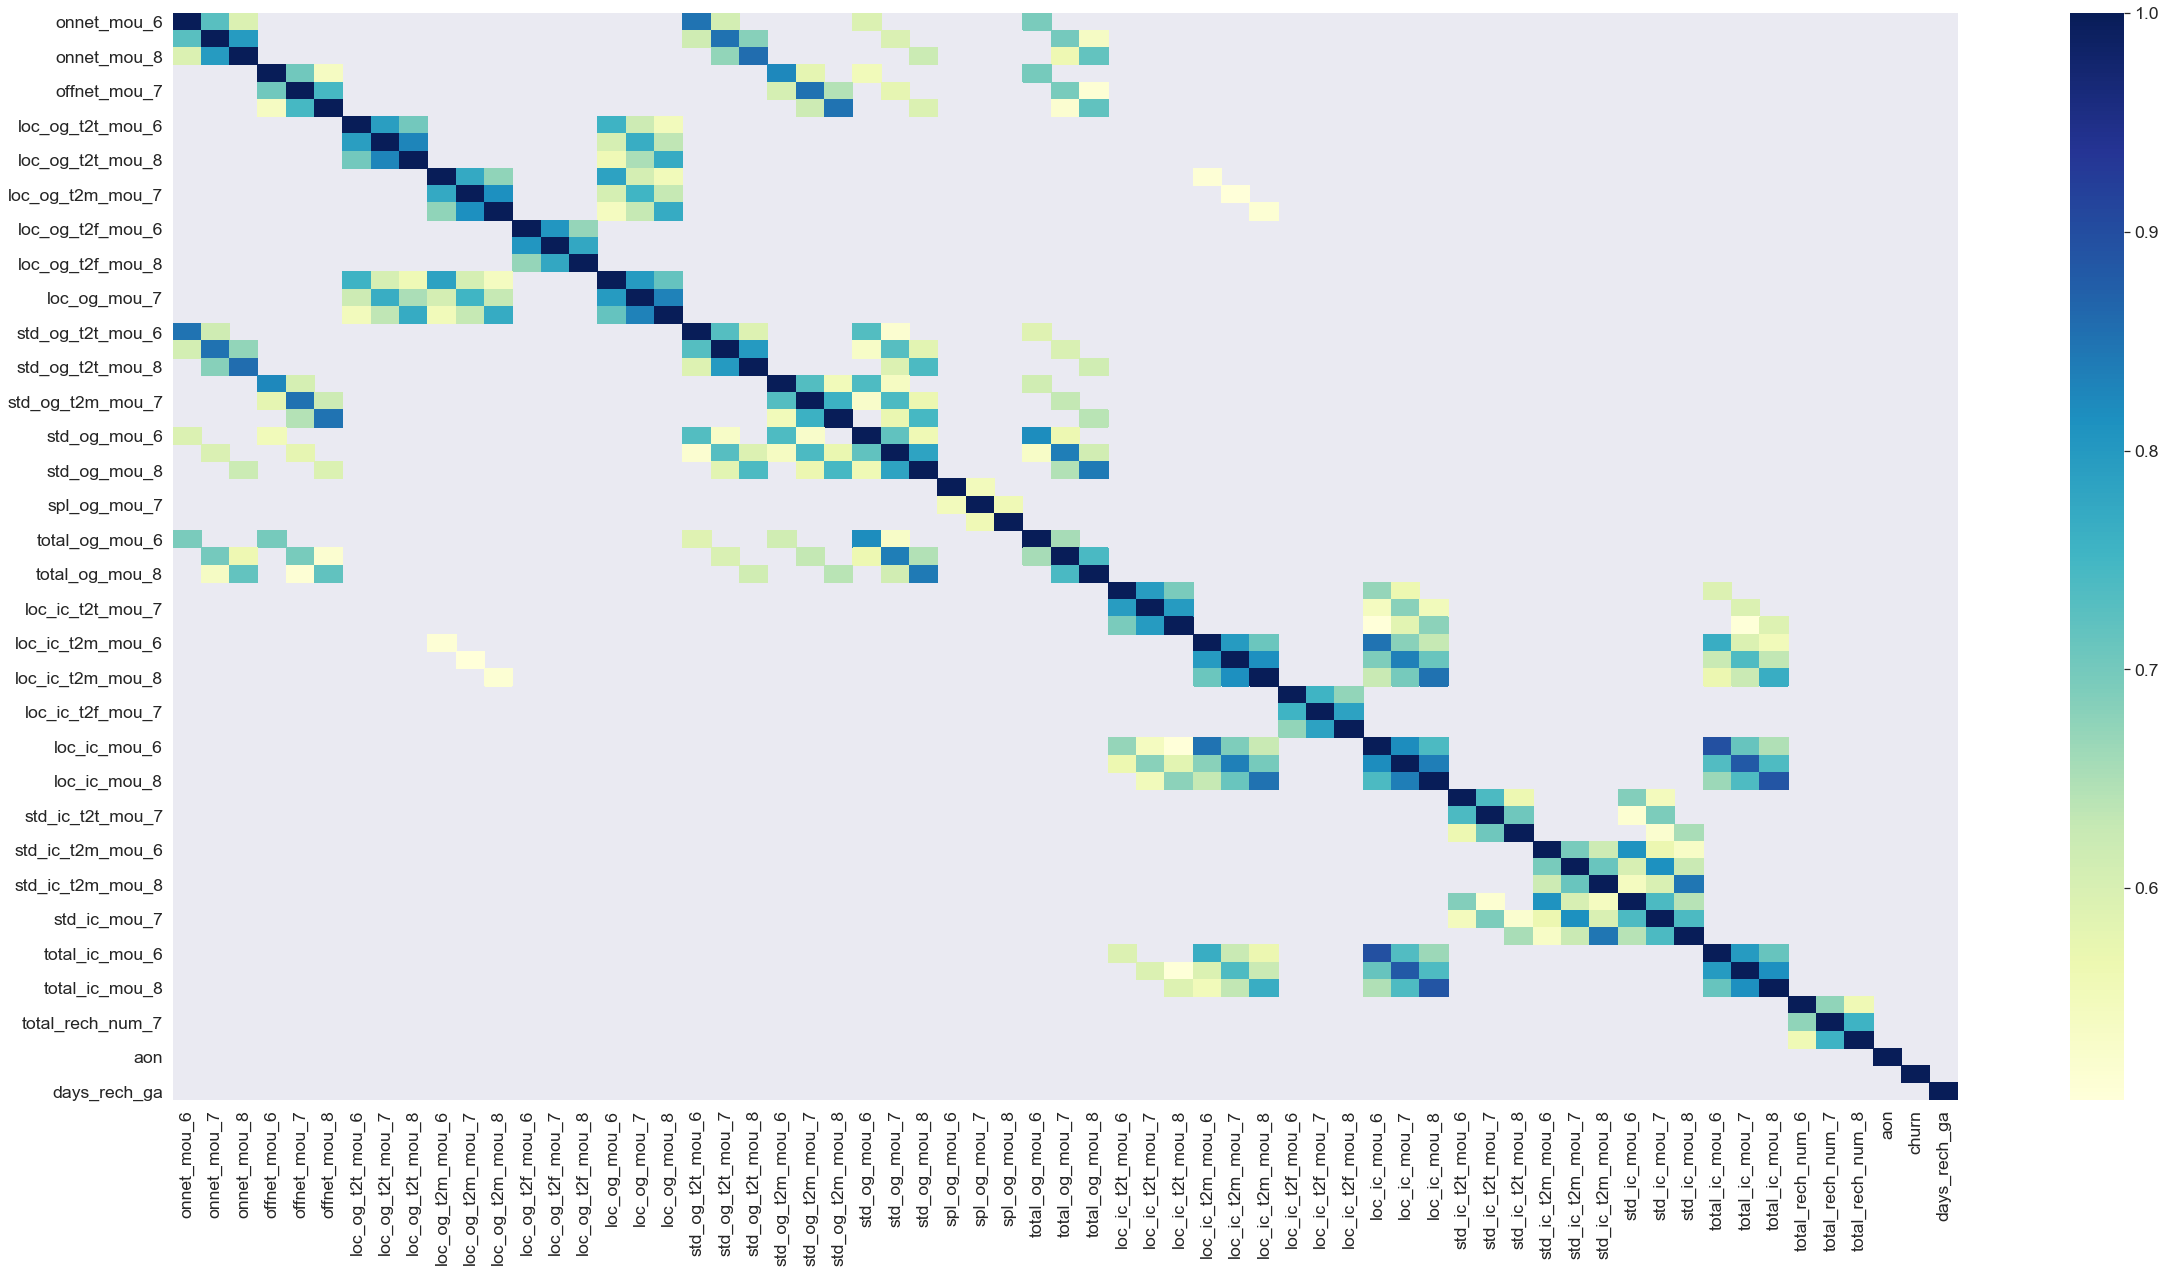

In [95]:
#Let's visualize the high correlations >0.5 only
high_corr = corr[corr>.5]


plt.figure(figsize=(40, 20)) #Plot size

sns.set(font_scale=1.6) #Scale font size
sns.heatmap(high_corr ,cmap="YlGnBu") 

In [96]:
#Correlation of churned customers only
corr_churned = data[data['churn']==1].corr()
corr_churned

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,aon,churn,days_rech_ga
onnet_mou_6,1.0000,0.6733,0.3363,-0.0707,-0.1299,-0.0883,0.3160,0.1619,0.0948,-0.0216,-0.0731,-0.0539,-0.0303,-0.0406,-0.0612,0.1927,0.0358,0.0033,0.9190,0.6382,0.3270,-0.0560,-0.0985,-0.0630,0.5963,0.3609,0.1968,0.1232,0.1010,0.0477,0.6441,0.3534,0.1769,0.1050,0.0673,0.0449,-0.0206,-0.0789,-0.0538,-0.0418,-0.0504,-0.0368,0.0249,-0.0250,-0.0235,0.1211,0.0841,0.0668,-0.0356,-0.0508,-0.0562,0.0520,0.0070,-0.0253,0.0347,-0.0298,-0.0355,0.2724,0.0640,0.0477,-0.0634,nan,-0.0101
onnet_mou_7,0.6733,1.0000,0.6417,-0.1164,-0.0185,0.0179,0.1176,0.2741,0.2089,-0.0647,-0.0030,0.0120,-0.0276,-0.0232,-0.0160,0.0340,0.1509,0.1111,0.6586,0.9431,0.6138,-0.0856,-0.0094,0.0184,0.3936,0.6337,0.4541,0.0420,0.1819,0.1432,0.3885,0.6530,0.4423,0.0124,0.0543,0.0787,-0.0613,-0.0129,0.0202,-0.0222,-0.0139,-0.0008,-0.0417,0.0185,0.0469,0.0832,0.1348,0.1677,-0.0573,-0.0082,-0.0019,0.0128,0.0709,0.0619,-0.0399,0.0398,0.0562,0.0998,0.2493,0.1958,-0.0375,nan,0.0972
onnet_mou_8,0.3363,0.6417,1.0000,-0.0808,0.0023,0.1672,0.0589,0.1598,0.2917,-0.0491,-0.0084,0.1048,-0.0094,-0.0113,0.0648,0.0069,0.0835,0.2255,0.3177,0.5794,0.9256,-0.0675,0.0044,0.1191,0.1704,0.3967,0.7411,-0.0027,0.0648,0.2457,0.1645,0.4039,0.7370,0.0090,0.0432,0.1900,-0.0396,-0.0123,0.1324,-0.0078,-0.0031,0.0492,-0.0258,0.0145,0.1784,0.0440,0.0837,0.2313,-0.0419,-0.0074,0.0448,-0.0011,0.0420,0.1280,-0.0296,0.0255,0.1952,0.0330,0.1860,0.4529,0.0148,nan,0.0516
offnet_mou_6,-0.0707,-0.1164,-0.0808,1.0000,0.5843,0.2383,0.0166,0.0062,-0.0111,0.2807,0.1227,0.0221,0.0487,0.0324,-0.0304,0.1944,0.0938,0.0095,-0.0763,-0.1155,-0.0791,0.9207,0.5564,0.2335,0.6307,0.3287,0.0862,0.1395,0.0818,0.0232,0.6811,0.3443,0.0816,0.0598,0.0035,-0.0404,0.1082,0.0364,-0.0198,0.0268,-0.0101,-0.0225,0.1070,0.0255,-0.0339,-0.0025,-0.0218,-0.0288,0.1499,0.0809,0.0288,0.1012,0.0499,0.0139,0.1325,0.0345,-0.0260,0.3087,0.0728,-0.0202,-0.0483,nan,-0.0659
offnet_mou_7,-0.1299,-0.0185,0.0023,0.5843,1.0000,0.5823,-0.0254,0.0656,0.0579,0.1195,0.3075,0.1950,0.0510,0.0651,0.0219,0.0643,0.2619,0.1754,-0.1197,-0.0314,-0.0111,0.5557,0.9221,0.5451,0.3295,0.6541,0.3269,0.0473,0.1723,0.1249,0.3396,0.7119,0.3509,-0.0090,0.0531,0.0305,0.0251,0.1663,0.1033,0.0091,0.0213,0.0174,0.0154,0.1461,0.0867,-0.0254,0.0165,0.0305,0.0495,0.1585,0.1067,0.0167,0.1326,0.1044,0.0146,0.1776,0.1148,0.0754,0.3801,0.1787,-0.0166,nan,0.0725
offnet_mou_8,-0.0883,0.0179,0.1672,0.2383,0.5823,1.0000,-0.0147,0.0583,0.1790,0.0384,0.2049,0.4342,0.0658,0.0696,0.1048,0.0214,0.1854,0.4181,-0.0893,-0.0020,0.1153,0.2013,0.4999,0.8711,0.0876,0.3650,0.6186,0.0089,0.1291,0.2561,0.0921,0.4127,0.6905,-0.0096,0.0288,0.1520,0.0051,0.1451,0.3202,0.0201,0.0279,0.0710,0.0018,0.1193,0.2952,0.0230,0.0523,0.1332,0.0280,0.0776,0.2203,0.0341,0.0911,0.2430,0.0146,0.1365,0.3466,-0.0219,0.2225,0.4068,0.0546,nan,0.0544
loc_og_t2t_mou_6,0.3160,0.1176,0.0589,0.0166,-0.0254,-0.0147,1.0000,0.5881,0.4296,0.1655,0.0805,0.0596,0.0105,0.0041,0.0157,0.7690,0.3908,0.2572,-0.0409,-0.0493,-0.0285,-0.0306,-0.0488,-0.0331,-0.0511,-0.0693,-0.0410,-0.0141,-0.0070,0.0031,0.2413,0.0674

<Figure size 2880x1440 with 0 Axes>

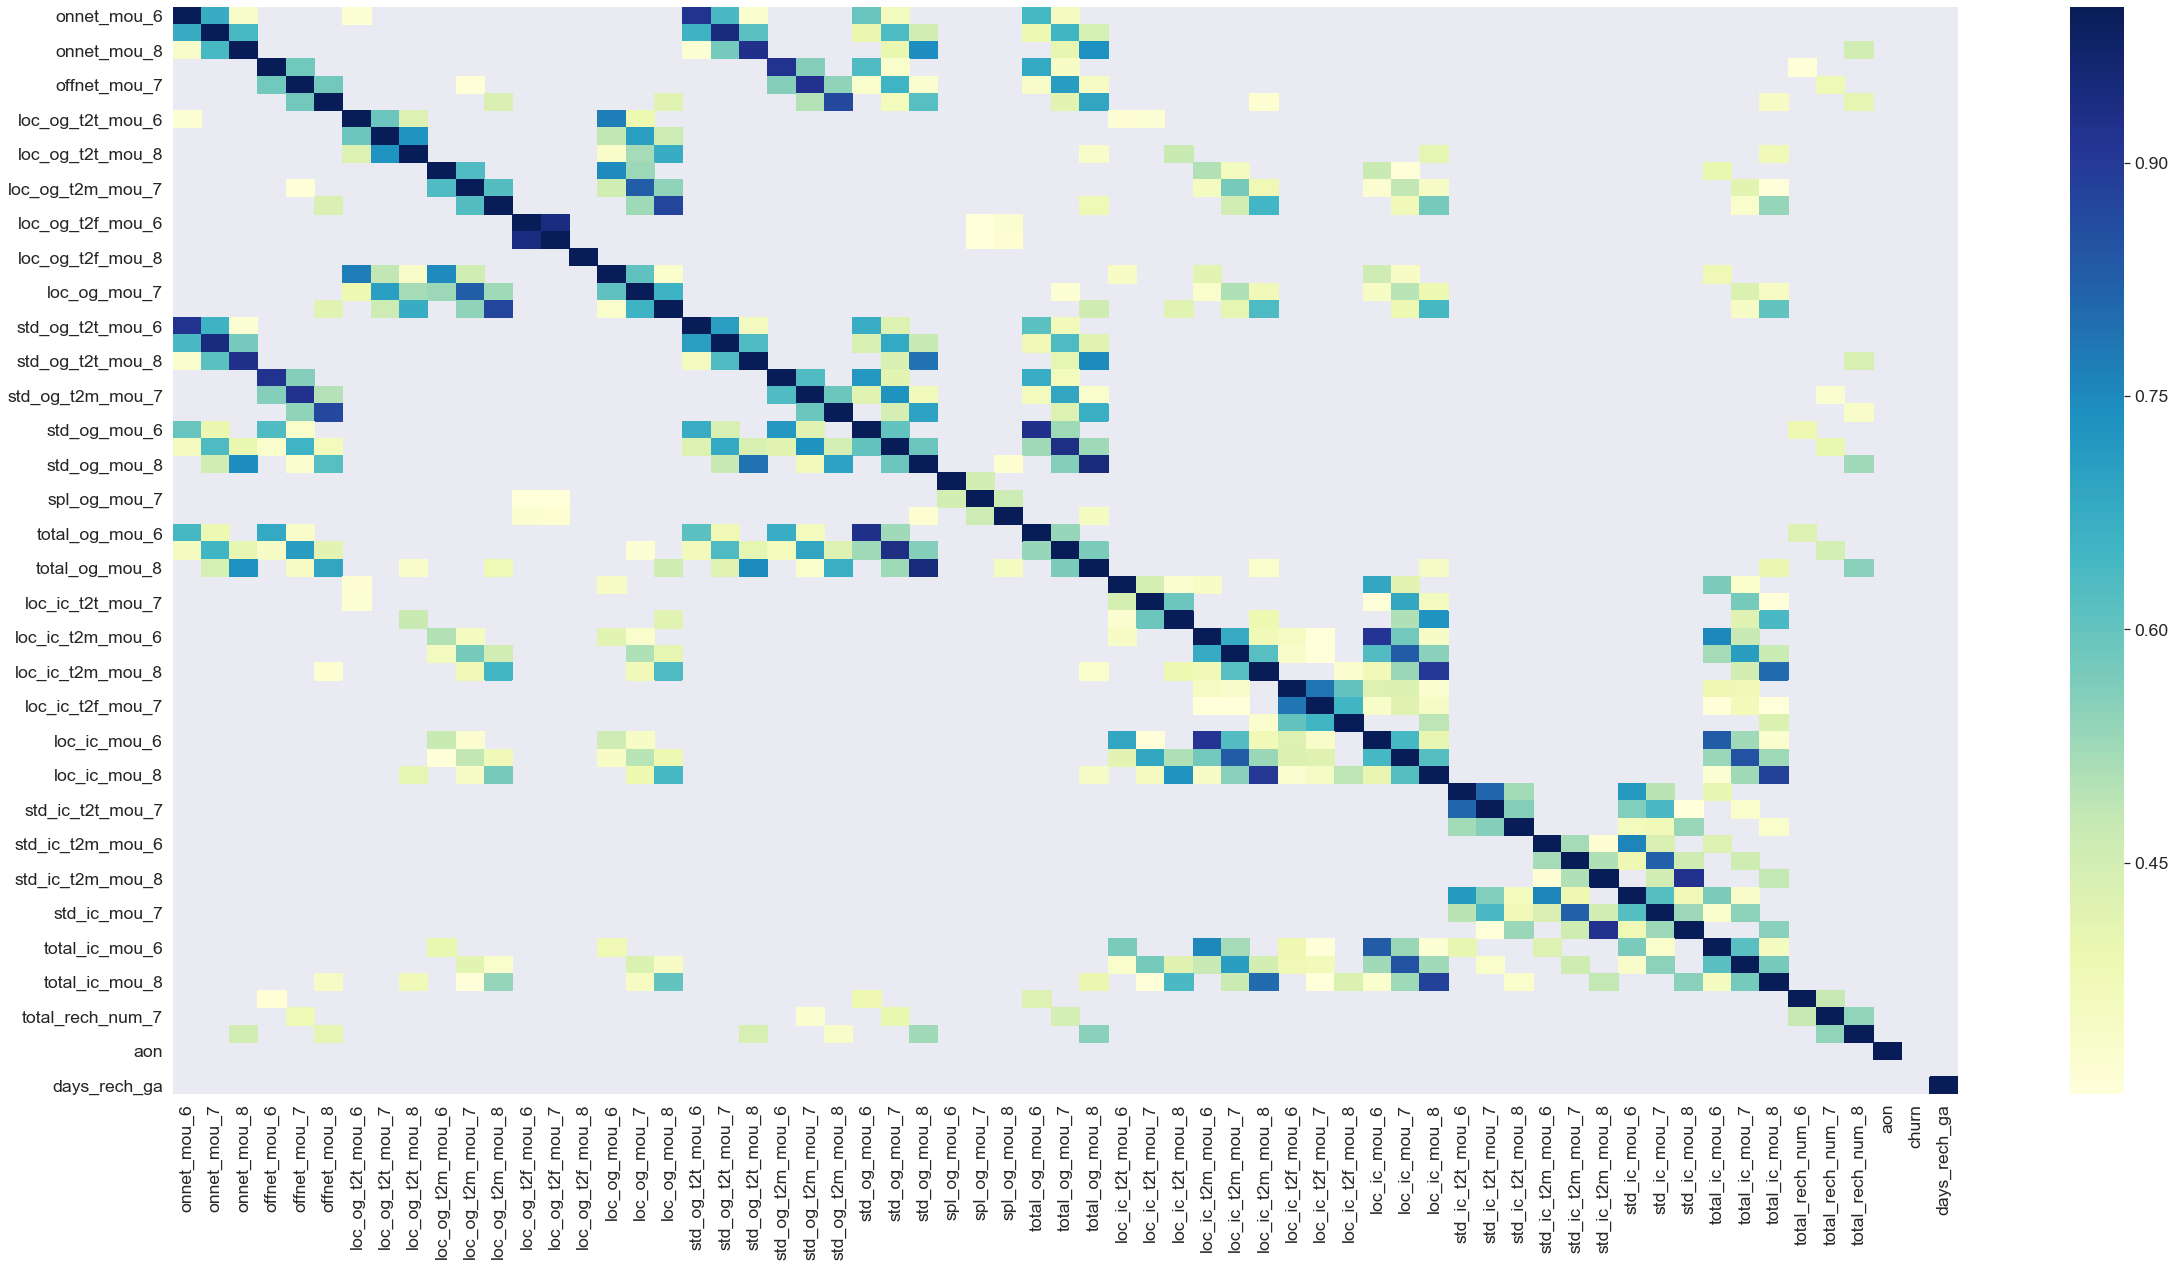

In [97]:
#Let's visualize churned customers at corr>0.3

high_corr_churned = corr_churned[corr_churned>.3]


plt.figure(figsize=(40, 20)) #Plot size

sns.set(font_scale=1.6) #Scale font size
sns.heatmap(high_corr_churned ,cmap="YlGnBu") 

In [98]:
#Is total_ic_mou and loc_ic_mou_6 an exact sum of other columns?
data[['total_ic_mou_6','loc_ic_mou_6','loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','std_ic_mou_6']]

,total_ic_mou_6,loc_ic_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,std_ic_mou_6
7,626.4600,427.8800,58.1400,217.5600,152.1600,180.5400
8,103.8600,81.4300,23.8400,57.5800,0.0000,22.4300
13,968.6100,215.5800,67.8800,142.8800,4.8100,423.8100
16,364.8600,276.8600,41.3300,226.8100,8.7100,87.9900
17,91.8800,81.9600,34.5400,47.4100,0.0000,9.9100
21,207.0900,125.3300,2.4800,118.2300,4.6100,81.7600
24,439.0400,283.6800,24.2800,161.0800,98.3100,155.3600
33,7.8900,3.4800,1.7500,0.0000,1.7300,3.1800
38,70.7900,46.6800,8.6800,37.9900,0.0000,24.1100
41,278.3100,83.4300,59.5400,12.1800,11.7000,0.0000


In [99]:
data[['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_mou_6', 'std_og_t2m_mou_6', 'std_og_mou_6', 'total_og_mou_6']]

,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_mou_6,std_og_t2m_mou_6,std_og_mou_6,total_og_mou_6
7,51.3900,308.6300,422.1600,49.8900,60.8600,487.5300
8,297.1300,80.9600,378.0900,13.6900,130.2600,508.3600
13,49.6300,151.1300,205.3100,255.3600,701.7800,907.0900
16,42.6100,273.2900,315.9100,22.9900,30.8900,346.8100
17,38.9900,58.5400,97.5400,1.5500,1148.4600,1249.5300
21,4.4800,91.8100,97.0400,665.3600,763.2900,860.3400
24,43.6900,219.7400,275.8300,198.4100,278.2400,564.6300
33,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
38,29.8800,33.7600,63.6400,55.0900,274.2100,337.8600
41,86.3900,142.6900,283.2400,0.0000,34.6800,318.7600


>**Observation**: It is evident that the *loc_ic_mou_6* and *total_ic_mou_6* are sum of other variables as follows:
- loc_ic_mou_6 = loc_ic_t2t_mou_6+loc_ic_t2m_mou_6+loc_ic_t2f_mou_6
- total_ic_mou_6 = loc_ic_mou_6+std_ic_mou_6


>**Action**: 
- Let's drop *loc_ic_mou* and *total_ic_mou* for months 6,7 & 8 as this will reduce multicollinearity without losing any information at all.
- For the same reason, let's also drop *loc_og_mou*, *total_og_mou*, *std_og_mou* and *std_ic_mou_6* for months 6,7 & 8. Some of the columns that add up to these variables were dropped earlier (because of too many zeroes) so I won't get an exact sum now.

In [101]:
#Delete columns as described above.
del_cols = ['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','total_og_mou_6','total_og_mou_7','total_og_mou_8','std_og_mou_6','std_og_mou_7','std_og_mou_8','std_ic_mou_6','std_ic_mou_7','std_ic_mou_8']

data.drop(del_cols,axis=1,inplace=True)

KeyError: "['loc_ic_mou_6' 'loc_ic_mou_7' 'loc_ic_mou_8' 'total_ic_mou_6'\n 'total_ic_mou_7' 'total_ic_mou_8' 'loc_og_mou_6' 'loc_og_mou_7'\n 'loc_og_mou_8' 'total_og_mou_6' 'total_og_mou_7' 'total_og_mou_8'\n 'std_og_mou_6' 'std_og_mou_7' 'std_og_mou_8' 'std_ic_mou_6'\n 'std_ic_mou_7' 'std_ic_mou_8'] not found in axis"

In [102]:
#Let's quickly check the distribution of numeric data
data.describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,aon,churn,days_rech_ga
count,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000
mean,296.9866,307.6259,272.2704,416.9476,426.0235,379.6921,95.0722,96.7701,88.4883,180.7798,182.0565,169.5069,6.9498,7.0885,6.5346,190.3715,202.0291,175.3608,202.7500,214.5138,181.9084,5.9187,7.4878,7.0126,69.0517,71.1102,67.0602,159.8569,162.1767,156.0700,15.6180,16.5856,14.8970,16.2187,17.0465,15.3284,31.9493,33.7549,30.9626,12.1636,12.0428,10.4405,1264.5354,0.0769,-30.2986
std,459.8573,483.5824,469.6132,467.0863,484.9066,475.2794,238.1255,250.0358,236.8836,248.6445,240.1922,233.6629,22.6907,22.6527,20.2956,408.5712,429.8473,413.2703,411.4259,437.8746,417.4951,18.6670,23.2709,23.1270,157.9927,168.6810,157.2009,220.7689,220.4824,218.4442,45.9208,49.6558,44.0031,79.1324,85.4107,73.1956,99.4020,106.3661,106.4351,9.4818,9.5829,9.4484,973.6707,0.2664,5.6384
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000,180.0000,0.0000,-61.0000
25%,41.8900,42.3100,29.3100,137.7600,138.2300,101.3800,8.4300,9.3800,6.3300,30.5300,34.1600,24.2800,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.7300,1.5000,0.0500,0.0000,0.0000,0.0000,8.4900,9.7300,7.3400,33.9100,38.9900,31.4800,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4600,0.5100,0.0500,6.0000,6.0000,4.0000,480.0000,0.0000,-33.0000
50%,126.7900,127.9300,103.2400,282.3900,284.9100,246.1800,32.6900,33.6800,29.5600,101.3600,105.0900,92.5600,0.3300,0.4100,0.2300,13.3800,14.3100,6.6900,38.3900,38.8800,25.5300,0.2300,0.8000,0.6000,29.3800,30.6900,27.5800,94.4300,97.7600,91.9300,1.9600,2.2500,1.9300,1.0800,1.2600,0.6600,7.1600,7.6100,5.9900,10.0000,9.0000,8.0000,917.0000,0.0000,-31.0000
75%,355.7300,366.4100,304.3800,522.4900,535.7300,488.5900,91.8300,92.2900,86.0600,239.6400,240.4800,226.2300,5.0500,5.2300,4.7500,179.9300,195.4800,139.0100,211.6400,226.4100,169.4400,5.1800,7.2000,6.5800,74.2100,75.5100,71.7300,203.2600,204.9800,199.6800,12.4400,13.0800,11.8600,10.3800,11.1300,9.1400,27.5800,29.4900,25.9400,15.0000,15.0000,13.0000,1920.0000,0.0000,-28.0000
max,7376.7100,8157.7800,10752.5600,8362.3600,9667.1300,14007.3400,6431.3300,7400.6600,10752.5600,4729.7400,4557.1400,4961.3300,1466.0300,1196.4300,928.4900,7366.5800,8133.6600,8014.4300,8314.7600,9284.7400,13950.0400,1023.2100,1265.7900,1390.8800,6351.4400,5709.5900,4003.2100,4693.8600,4388.7300,5738.4600,1678.4100,1983.0100,1588.5300,5459.5600,5800.9300,4309.2900,4630.2300,3470.3800,5645.8600,307.0000,138.0000,196.0000,4321.0000,1.0000,-1.0000


>**Observations**:
- For all customers, correlation between variables for months 6 & 7 and that between months 7 & 8 are similar and is typically around 0.7. The correlation between months 6& 8 are slightly lower but close to 0.7.
- For churned customers, the correlations between variables for months 6 & 7 and that between months 7 & 8 are similar and lower than for all customers (typically 0.5 to 0.6). Howerver, correlation between months 6 * 8 is significiantly lower and hovers around 0.3 typically - I'm not certain why this is though.

> **Action**: 
Although months 6 & 7 are suppose to be similar by definition of the 'Good Phase' and so dropping month 6 would reduce multicollinearity, because of the odd relationship of month 6 & 8 for churned customers (described above) dropping month 6 variables will likely lead to some loss of information. Also, we need to not only deal with the correlation between good and active phases but also capture the change in behavior from Good to Active phase. 

> Therefore, let's average all variables for months 6 & 7 and substract month 8 variables from this average to best capture information, relationships and change in behavior across good & active phases. **These derived variables will signify the change in behavior (drop/increase in utilization) from Good to Active Phase**

In [103]:
data.shape

(29285, 45)

In [104]:
#Let's get the column names 
data.head(1)

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,aon,churn,days_rech_ga
7,57.8400,54.6800,52.2900,453.4300,567.1600,325.9100,51.3900,31.3800,40.2800,308.6300,447.3800,162.2800,62.1300,55.1400,53.2300,4.3000,23.2900,12.0100,49.8900,31.7600,49.1400,4.5000,0.0000,6.5000,58.1400,32.2600,27.3100,217.5600,221.4900,121.1900,152.1600,101.4600,39.5300,36.8900,11.8300,30.3900,91.4400,126.9900,141.3300,5,5,7,802,1,-32


In [105]:
# #These variables will signify the drop in utilization attributes from Good to Active Phase.
data['onnet_mou_ga'] = (data[['onnet_mou_6','onnet_mou_7']].mean(axis=1) - data['onnet_mou_8'])/ data[['onnet_mou_6','onnet_mou_7']].mean(axis=1)
data.drop(['onnet_mou_6','onnet_mou_7','onnet_mou_8'],axis=1,inplace=True)

data['offnet_mou_ga'] = (data[['offnet_mou_6','offnet_mou_7']].mean(axis=1) - data['offnet_mou_8'])/data[['offnet_mou_6','offnet_mou_7']].mean(axis=1)
data.drop(['offnet_mou_6','offnet_mou_7','offnet_mou_8'],axis=1,inplace=True)

data['loc_og_t2t_mou_ga'] = (data[['loc_og_t2t_mou_6','loc_og_t2t_mou_7']].mean(axis=1) - data['loc_og_t2t_mou_8'])/data[['loc_og_t2t_mou_6','loc_og_t2t_mou_7']].mean(axis=1)
data.drop(['loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8'],axis=1,inplace=True)

data['loc_og_t2m_mou_ga'] = (data[['loc_og_t2m_mou_6','loc_og_t2m_mou_7']].mean(axis=1) - data['loc_og_t2m_mou_8'])/data[['loc_og_t2m_mou_6','loc_og_t2m_mou_7']].mean(axis=1)
data.drop(['loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8'],axis=1,inplace=True)

data['std_og_t2m_mou_ga'] = (data[['std_og_t2m_mou_6','std_og_t2m_mou_7']].mean(axis=1) - data['std_og_t2m_mou_8'])/data[['std_og_t2m_mou_6','std_og_t2m_mou_7']].mean(axis=1)
data.drop(['std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8'],axis=1,inplace=True)

data['loc_ic_t2t_mou_ga'] = (data[['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7']].mean(axis=1) - data['loc_ic_t2t_mou_8'])/data[['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7']].mean(axis=1)
data.drop(['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8'],axis=1,inplace=True)

data['loc_ic_t2m_mou_ga'] = (data[['loc_ic_t2m_mou_6','loc_ic_t2m_mou_7']].mean(axis=1) - data['loc_ic_t2m_mou_8'])/data[['loc_ic_t2m_mou_6','loc_ic_t2m_mou_7']].mean(axis=1)
data.drop(['loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8'],axis=1,inplace=True)

data['loc_ic_t2f_mou_ga'] = (data[['loc_ic_t2f_mou_6','loc_ic_t2f_mou_7']].mean(axis=1) - data['loc_ic_t2f_mou_8'])/data[['loc_ic_t2f_mou_6','loc_ic_t2f_mou_7']].mean(axis=1)
data.drop(['loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8'],axis=1,inplace=True)

data['std_ic_t2m_mou_ga'] = (data[['std_ic_t2m_mou_6','std_ic_t2m_mou_7']].mean(axis=1) - data['std_ic_t2m_mou_8'])/data[['std_ic_t2m_mou_6','std_ic_t2m_mou_7']].mean(axis=1)
data.drop(['std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8'],axis=1,inplace=True)

data['total_rech_num_ga'] = (data[['total_rech_num_6','total_rech_num_7']].mean(axis=1) - data['total_rech_num_8'])/data[['total_rech_num_6','total_rech_num_7']].mean(axis=1)
data.drop(['total_rech_num_6','total_rech_num_7','total_rech_num_8'],axis=1,inplace=True)

data['spl_og_mou_ga'] = (data[['spl_og_mou_6','spl_og_mou_7']].mean(axis=1) - data['spl_og_mou_8'])/data[['spl_og_mou_6','spl_og_mou_7']].mean(axis=1)
data.drop(['spl_og_mou_6','spl_og_mou_7','spl_og_mou_8'],axis=1,inplace=True)

data['loc_og_t2f_mou_ga'] = (data[['loc_og_t2f_mou_6','loc_og_t2f_mou_7']].mean(axis=1) - data['loc_og_t2f_mou_8'])/data[['loc_og_t2f_mou_6','loc_og_t2f_mou_7']].mean(axis=1)
data.drop(['loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8'],axis=1,inplace=True)

data['std_ic_t2t_mou_ga'] = (data[['std_ic_t2t_mou_6','std_ic_t2t_mou_7']].mean(axis=1) - data['std_ic_t2t_mou_8'])/data[['std_ic_t2t_mou_6','std_ic_t2t_mou_7']].mean(axis=1)
data.drop(['std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8'],axis=1,inplace=True)

data['std_og_t2t_mou_ga'] = (data[['std_og_t2t_mou_6','std_og_t2t_mou_7']].mean(axis=1) - data['std_og_t2t_mou_8'])/data[['std_og_t2t_mou_6','std_og_t2t_mou_7']].mean(axis=1)
data.drop(['std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8'],axis=1,inplace=True)


In [106]:
#Outcome?
data.describe()

,aon,churn,days_rech_ga,onnet_mou_ga,offnet_mou_ga,loc_og_t2t_mou_ga,loc_og_t2m_mou_ga,std_og_t2m_mou_ga,loc_ic_t2t_mou_ga,loc_ic_t2m_mou_ga,loc_ic_t2f_mou_ga,std_ic_t2m_mou_ga,total_rech_num_ga,spl_og_mou_ga,loc_og_t2f_mou_ga,std_ic_t2t_mou_ga,std_og_t2t_mou_ga
count,29285.0000,29285.0000,29285.0000,28961.0000,29100.0000,28596.0000,28882.0000,26443.0000,28734.0000,28962.0000,24704.0000,26878.0000,29285.0000,23184.0000,20656.0000,22767.0000,22273.0000
mean,1264.5354,0.0769,-30.2986,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.1164,-inf,-inf,-inf,-inf
std,973.6707,0.2664,5.6384,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.4765,nan,nan,nan,nan
min,180.0000,0.0000,-61.0000,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-7.2500,-inf,-inf,-inf,-inf
25%,480.0000,0.0000,-33.0000,-0.3184,-0.2445,-0.4228,-0.3294,-0.4787,-0.4668,-0.3512,-0.8798,-0.7709,-0.1250,-1.9534,-0.9822,-0.9948,-0.5001
50%,917.0000,0.0000,-31.0000,0.1316,0.1085,0.1461,0.1061,0.2392,0.1104,0.0610,0.2476,0.2781,0.1746,0.3518,0.3234,0.4283,0.2523
75%,1920.0000,0.0000,-28.0000,0.5194,0.4350,0.5824,0.4756,0.8084,0.5431,0.4032,0.8664,0.8626,0.4340,1.0000,1.0000,1.0000,0.8962
max,4321.0000,1.0000,-1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9826,1.0000,1.0000,1.0000,1.0000


>**Observation**: Because of the division in the above calculation, some values have become inifite or NaN. This practically inidicates that some services' utilization was 0 in good and active phase (null) or there was no utilization in good phase but some utilization in active phase (infinite). So let's replace these values with 0 and -500 respectively; the latter (-500) will always be lower than all numbers as the derived column is a percentage/ratio.

In [107]:
#Replace NaN with 0 and -inf with -500
data = data.fillna(0)
data = data.replace([-np.inf], -500)

In [108]:
#Outcome?
data.describe()

,aon,churn,days_rech_ga,onnet_mou_ga,offnet_mou_ga,loc_og_t2t_mou_ga,loc_og_t2m_mou_ga,std_og_t2m_mou_ga,loc_ic_t2t_mou_ga,loc_ic_t2m_mou_ga,loc_ic_t2f_mou_ga,std_ic_t2m_mou_ga,total_rech_num_ga,spl_og_mou_ga,loc_og_t2f_mou_ga,std_ic_t2t_mou_ga,std_og_t2t_mou_ga
count,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000
mean,1264.5354,0.0769,-30.2986,-1.4281,-0.6455,-4.2872,-1.9587,-14.7392,-4.6088,-1.9311,-28.7181,-18.1919,0.1164,-45.8156,-30.1661,-28.7642,-17.7400
std,973.6707,0.2664,5.6384,27.5959,17.3825,50.5900,29.7784,105.8050,54.7387,29.8727,116.2618,102.7169,0.4765,164.9141,118.4425,127.6950,95.7751
min,180.0000,0.0000,-61.0000,-2415.0000,-500.0000,-3321.0000,-770.0000,-11195.0000,-4887.0000,-1311.0000,-2889.5455,-7385.0000,-7.2500,-9241.0000,-1897.0000,-9335.0000,-3471.0000
25%,480.0000,0.0000,-33.0000,-0.3118,-0.2413,-0.3997,-0.3207,-0.3600,-0.4497,-0.3437,-0.5401,-0.6131,-0.1250,-0.8705,-0.2040,-0.3629,-0.1853
50%,917.0000,0.0000,-31.0000,0.1239,0.1049,0.1241,0.0978,0.1194,0.0929,0.0522,0.0000,0.1546,0.1746,0.0000,0.0000,0.0000,0.0000
75%,1920.0000,0.0000,-28.0000,0.5146,0.4333,0.5699,0.4689,0.7433,0.5337,0.3987,0.7552,0.8173,0.4340,0.9545,0.7432,0.8951,0.6820
max,4321.0000,1.0000,-1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9826,1.0000,1.0000,1.0000,1.0000


In [109]:
#Reorganize columns for ease of reading
# data = data[['churn','aon','days_rech_ga','total_rech_num_ga', 'onnet_mou_ga', 'offnet_mou_ga','loc_og_t2m_mou_ga','loc_og_t2t_mou_ga','loc_ic_t2m_mou_ga', 'loc_ic_t2f_mou_ga','loc_og_t2f_mou_ga','loc_ic_t2t_mou_ga','std_ic_t2m_mou_ga','std_og_t2m_mou_ga','std_ic_t2t_mou_ga','std_og_t2t_mou_ga','spl_og_mou_ga'  ]]
# data.head(3)

>**Observation**: We're down to 17 columns

<a id="3.3"></a>
## Outliers 

In [110]:
data.describe()

,aon,churn,days_rech_ga,onnet_mou_ga,offnet_mou_ga,loc_og_t2t_mou_ga,loc_og_t2m_mou_ga,std_og_t2m_mou_ga,loc_ic_t2t_mou_ga,loc_ic_t2m_mou_ga,loc_ic_t2f_mou_ga,std_ic_t2m_mou_ga,total_rech_num_ga,spl_og_mou_ga,loc_og_t2f_mou_ga,std_ic_t2t_mou_ga,std_og_t2t_mou_ga
count,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000,29285.0000
mean,1264.5354,0.0769,-30.2986,-1.4281,-0.6455,-4.2872,-1.9587,-14.7392,-4.6088,-1.9311,-28.7181,-18.1919,0.1164,-45.8156,-30.1661,-28.7642,-17.7400
std,973.6707,0.2664,5.6384,27.5959,17.3825,50.5900,29.7784,105.8050,54.7387,29.8727,116.2618,102.7169,0.4765,164.9141,118.4425,127.6950,95.7751
min,180.0000,0.0000,-61.0000,-2415.0000,-500.0000,-3321.0000,-770.0000,-11195.0000,-4887.0000,-1311.0000,-2889.5455,-7385.0000,-7.2500,-9241.0000,-1897.0000,-9335.0000,-3471.0000
25%,480.0000,0.0000,-33.0000,-0.3118,-0.2413,-0.3997,-0.3207,-0.3600,-0.4497,-0.3437,-0.5401,-0.6131,-0.1250,-0.8705,-0.2040,-0.3629,-0.1853
50%,917.0000,0.0000,-31.0000,0.1239,0.1049,0.1241,0.0978,0.1194,0.0929,0.0522,0.0000,0.1546,0.1746,0.0000,0.0000,0.0000,0.0000
75%,1920.0000,0.0000,-28.0000,0.5146,0.4333,0.5699,0.4689,0.7433,0.5337,0.3987,0.7552,0.8173,0.4340,0.9545,0.7432,0.8951,0.6820
max,4321.0000,1.0000,-1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9826,1.0000,1.0000,1.0000,1.0000


>**Observation**: Outliers in various columns do exist, some were created due to the derived columns (_ga) we created. Let's address outliers through min_max scaling after train-test split.

<a id="3.4"></a>
## Analyze Target Variable
Let's understand the occurence of churn

0    27033
1     2252
Name: churn, dtype: int64

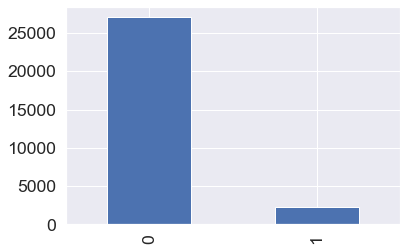

In [111]:
data['churn'].value_counts()
data['churn'].value_counts().plot.bar()

In [112]:
100*data['churn'].sum()/data['churn'].shape[0]

7.689943657162369

>**Observation**: Churn rate is 7.68%. The dataset is clearly imbalanced, let's balance it later. 

<a id="3.5"></a>
## Bivariate Analysis
Let's analyze the relationship of independent variables with Churn

In [113]:
data.head(1)

,aon,churn,days_rech_ga,onnet_mou_ga,offnet_mou_ga,loc_og_t2t_mou_ga,loc_og_t2m_mou_ga,std_og_t2m_mou_ga,loc_ic_t2t_mou_ga,loc_ic_t2m_mou_ga,loc_ic_t2f_mou_ga,std_ic_t2m_mou_ga,total_rech_num_ga,spl_og_mou_ga,loc_og_t2f_mou_ga,std_ic_t2t_mou_ga,std_og_t2t_mou_ga
7,802,1,-32,0.0706,0.3613,0.0267,0.5707,-0.2037,0.3958,0.4479,0.6883,-0.2941,-0.4000,-1.8889,0.0922,-0.2475,0.1294


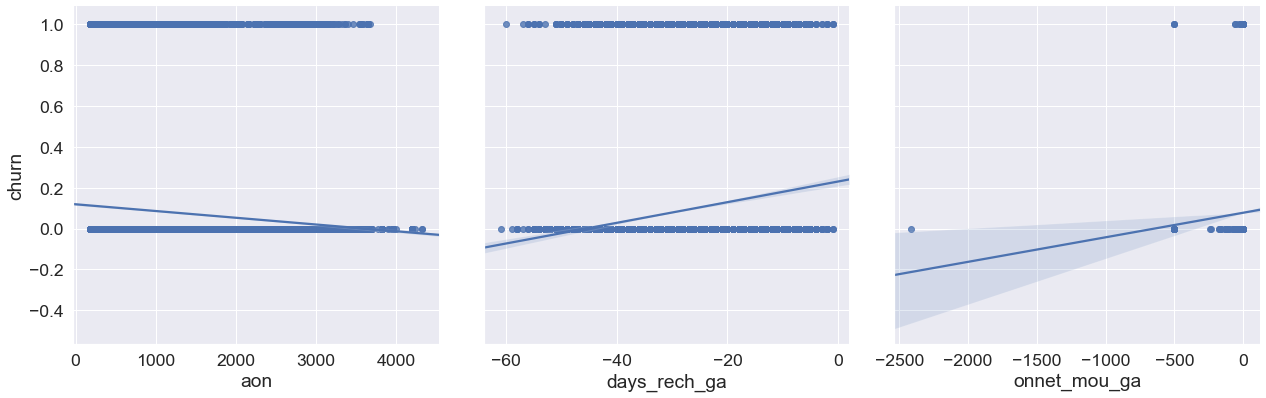

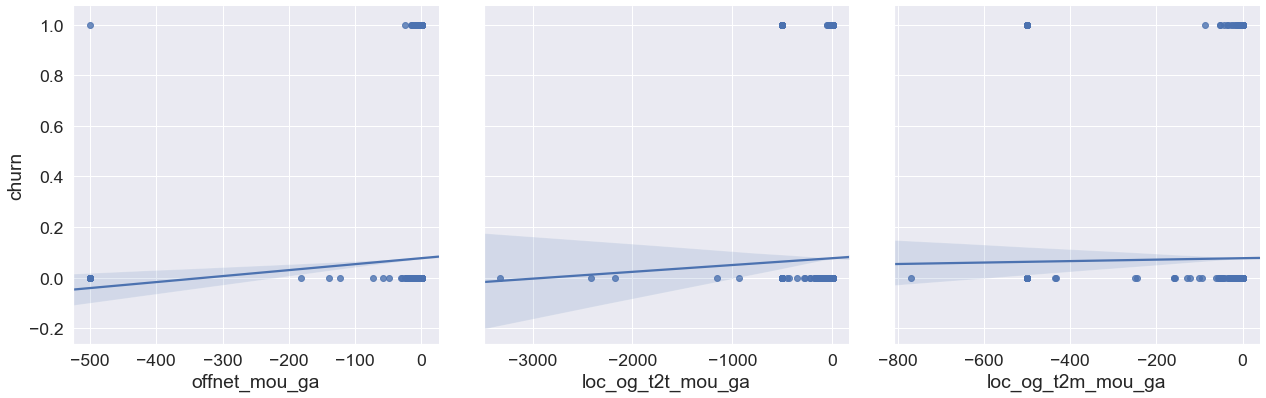

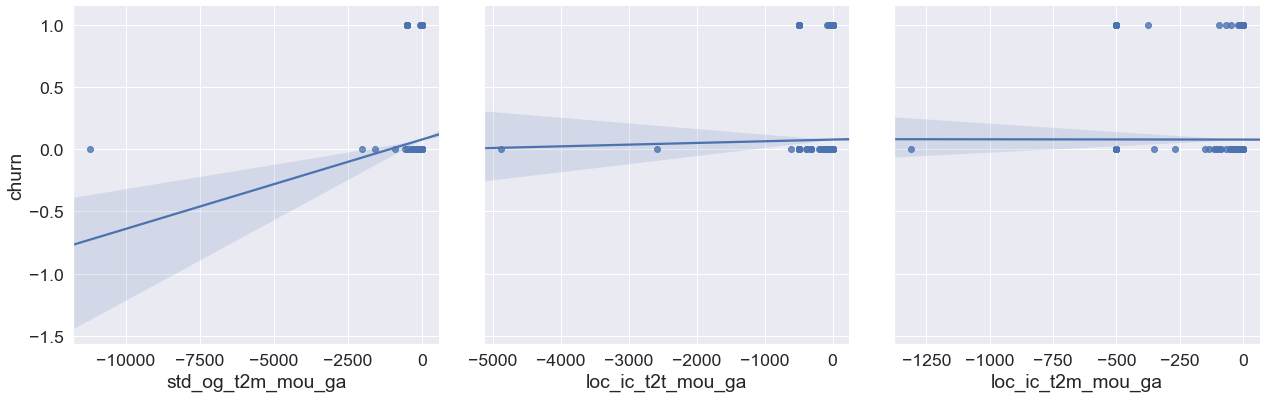

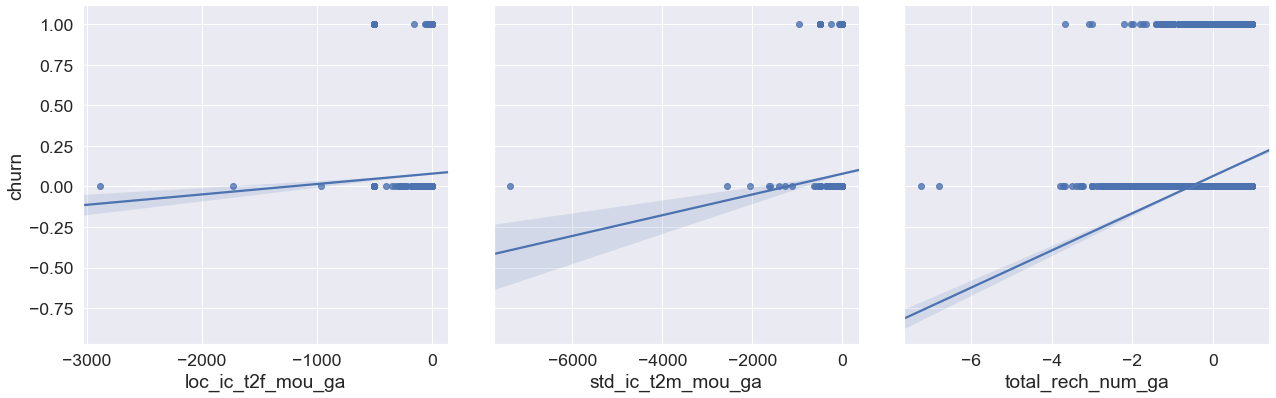

In [114]:
#Columns to create scatterplot against churn
cols = data.columns.tolist()
cols.remove('churn')

#Scatterplots
sns.pairplot(data,x_vars=cols[:3],height=6,aspect=1,y_vars='churn',kind='reg')
sns.pairplot(data,x_vars=cols[3:6],height=6,aspect=1,y_vars='churn',kind='reg')
sns.pairplot(data,x_vars=cols[6:9],height=6,aspect=1,y_vars='churn',kind='reg')
sns.pairplot(data,x_vars=cols[9:12],height=6,aspect=1,y_vars='churn',kind='reg')


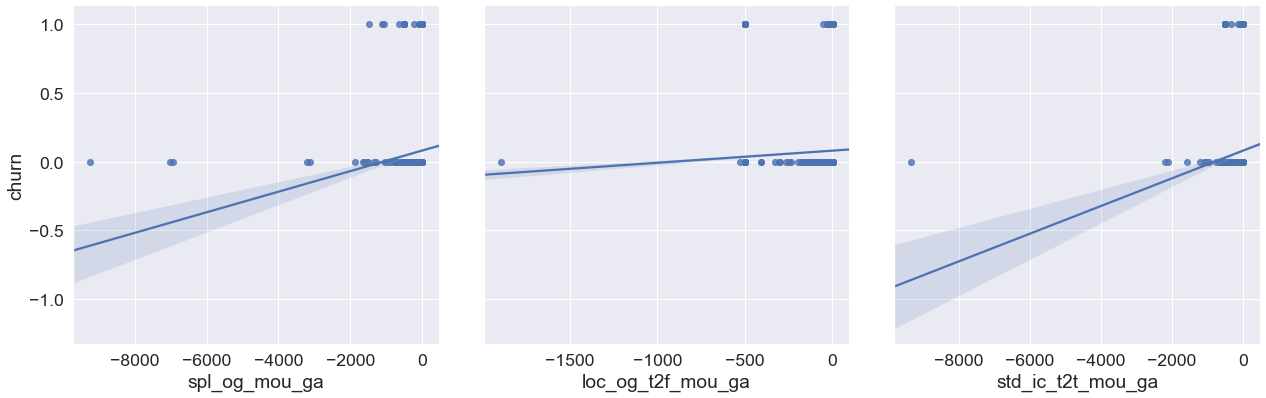

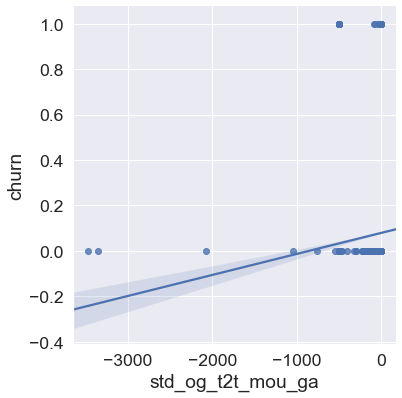

In [115]:
#Scatterplots continued
sns.pairplot(data,x_vars=cols[12:15],height=6,aspect=1,y_vars='churn',kind='reg')
sns.pairplot(data,x_vars=cols[15],height=6,aspect=1,y_vars='churn',kind='reg')

<Figure size 864x720 with 0 Axes>

Text(0.5, 0, 'All Predictors of Churn')

Text(0.5, 0, 'Churn')

Text(0, 0.5, 'Predictors')

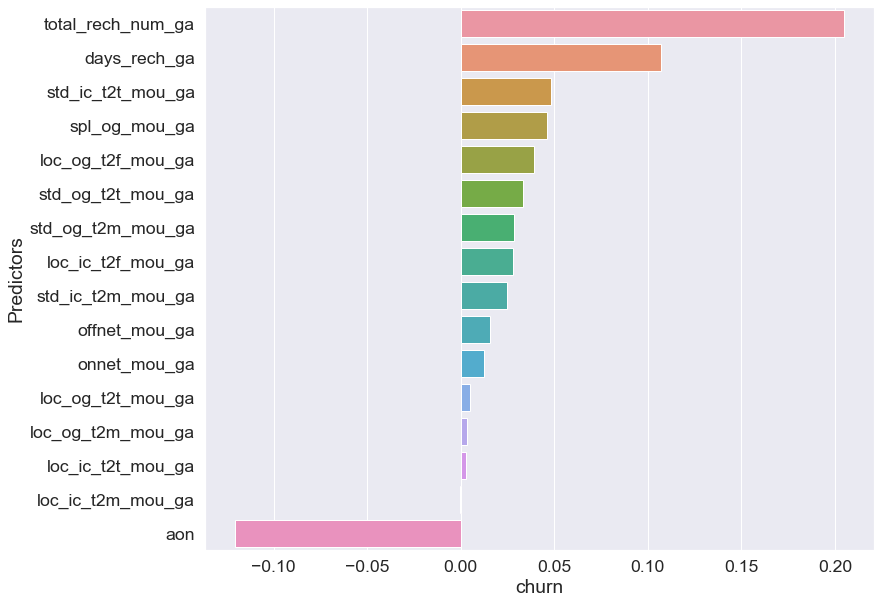

In [116]:
# Plot features sorted by correlation to churn
corr = data.corr().sort_values('churn', ascending=False)

plt.figure(figsize=(12,10))
plt.xlabel('All Predictors of Churn')
plt.xlabel('Churn')
plt.ylabel('Predictors')
sns.barplot(corr.churn[1:], corr.index[1:], orient='h') 
plt.show()

>**Observations**: 
- Greater the Age on Network and later the date of recharge (days_rech_ga) less likely that a customer will churn. This is observed as the negativel correlation.
- All other attributes signify a drop in utilization from Good to Active phase and are thus positive indicators of churn i.e. positively correlated to churn.
- The correlations tell us that we're on the right path with respect to the features we're including in our model.
- Most scatterplots don't tell us much about the relationship of predictor variables with Churn; there's a possibility that the relationship is not linear. Let's explore this later.

<a id="3.6"></a>
## Train-Test Split
Create a train & test dataset with a 70:30 ratio

In [117]:
#Split such that churn class is equally distributed in test and train
data_train,data_test = train_test_split(data,test_size=0.3,random_state=100,stratify=data['churn'])

In [118]:
data_train.shape
data_test.shape

data_train.mean()
data_test.mean()

(20499, 17)

(8786, 17)

aon                 1268.2575
churn                  0.0769
days_rech_ga         -30.3133
onnet_mou_ga          -1.4556
offnet_mou_ga         -0.7080
loc_og_t2t_mou_ga     -4.3860
loc_og_t2m_mou_ga     -2.0909
std_og_t2m_mou_ga    -15.0751
loc_ic_t2t_mou_ga     -4.5295
loc_ic_t2m_mou_ga     -2.0092
loc_ic_t2f_mou_ga    -27.9078
std_ic_t2m_mou_ga    -18.2005
total_rech_num_ga      0.1182
spl_og_mou_ga        -46.3353
loc_og_t2f_mou_ga    -29.5279
std_ic_t2t_mou_ga    -28.6185
std_og_t2t_mou_ga    -17.8309
dtype: float64

aon                 1255.8511
churn                  0.0769
days_rech_ga         -30.2644
onnet_mou_ga          -1.3640
offnet_mou_ga         -0.4998
loc_og_t2t_mou_ga     -4.0566
loc_og_t2m_mou_ga     -1.6504
std_og_t2m_mou_ga    -13.9556
loc_ic_t2t_mou_ga     -4.7938
loc_ic_t2m_mou_ga     -1.7488
loc_ic_t2f_mou_ga    -30.6086
std_ic_t2m_mou_ga    -18.1721
total_rech_num_ga      0.1120
spl_og_mou_ga        -44.6029
loc_og_t2f_mou_ga    -31.6552
std_ic_t2t_mou_ga    -29.1042
std_og_t2t_mou_ga    -17.5280
dtype: float64

In [122]:
#Distribution of classes in test and train datasets
100*data_test['churn'].sum()/data_test['churn'].shape[0]
100*data_train['churn'].sum()/data_train['churn'].shape[0]

KeyError: 'churn'

**Observation**: The distribution of 'churn' class is in similar ratios (7.69%) in test & train data sets

In [123]:
#Divide training data set in X and y
y_train = data_train.pop('churn')
X_train = data_train

KeyError: 'churn'

In [124]:
#Divide test data set in X and Y
y_test = data_test.pop('churn')
X_test = data_test

KeyError: 'churn'

<a id="3.7"></a>
## Rescale Variables
Let's bring all variables to the same scale.

>**Approach**: 
- Although not all algorithms, such as Decision Trees, require scaling for interpretability or algorithm performance, let's scale the variables for now and revisit scaling if needed. 
- Let's use MinMaxScaling to address outliers as well.

In [125]:
#Instantiate scaler object
scaler = MinMaxScaler()
# scaler = StandardScaler()

In [126]:
#Save the original non scaled data for later use
X_train_notscaled = X_train
X_test_notscaled = X_test

In [127]:
#Fit on and scale train variables
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=data_train.columns) #Convert to df

In [128]:
#Scale test variables
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test,columns=data_test.columns) #Convert to df

In [129]:
#Outcome
X_train.describe()
X_test.describe()

,aon,days_rech_ga,onnet_mou_ga,offnet_mou_ga,loc_og_t2t_mou_ga,loc_og_t2m_mou_ga,std_og_t2m_mou_ga,loc_ic_t2t_mou_ga,loc_ic_t2m_mou_ga,loc_ic_t2f_mou_ga,std_ic_t2m_mou_ga,total_rech_num_ga,spl_og_mou_ga,loc_og_t2f_mou_ga,std_ic_t2t_mou_ga,std_og_t2t_mou_ga
count,20499.0000,20499.0000,20499.0000,20499.0000,20499.0000,20499.0000,20499.0000,20499.0000,20499.0000,20499.0000,20499.0000,20499.0000,20499.0000,20499.0000,20499.0000,20499.0000
mean,0.2628,0.5114,0.9990,0.9966,0.9984,0.9960,0.9986,0.9910,0.9940,0.9900,0.9974,0.8950,0.9933,0.9839,0.9968,0.9909
std,0.2347,0.0935,0.0121,0.0365,0.0160,0.0401,0.0103,0.0732,0.0597,0.0398,0.0144,0.0580,0.0229,0.0619,0.0141,0.0448
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0732,0.4667,0.9995,0.9975,0.9996,0.9983,0.9999,0.9977,0.9973,0.9995,0.9998,0.8658,0.9997,0.9994,0.9999,0.9994
50%,0.1794,0.5000,0.9996,0.9982,0.9997,0.9988,0.9999,0.9985,0.9981,0.9997,0.9999,0.9021,0.9999,0.9995,0.9999,0.9995
75%,0.4197,0.5500,0.9998,0.9989,0.9999,0.9993,1.0000,0.9993,0.9988,0.9999,1.0000,0.9341,1.0000,0.9999,1.0000,0.9998
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,aon,days_rech_ga,onnet_mou_ga,offnet_mou_ga,loc_og_t2t_mou_ga,loc_og_t2m_mou_ga,std_og_t2m_mou_ga,loc_ic_t2t_mou_ga,loc_ic_t2m_mou_ga,loc_ic_t2f_mou_ga,std_ic_t2m_mou_ga,total_rech_num_ga,spl_og_mou_ga,loc_og_t2f_mou_ga,std_ic_t2t_mou_ga,std_og_t2t_mou_ga
count,8786.0000,8786.0000,8786.0000,8786.0000,8786.0000,8786.0000,8786.0000,8786.0000,8786.0000,8786.0000,8786.0000,8786.0000,8786.0000,8786.0000,8786.0000,8786.0000
mean,0.2598,0.5123,0.9990,0.9970,0.9985,0.9966,0.9987,0.9906,0.9945,0.9891,0.9974,0.8942,0.9935,0.9828,0.9968,0.9910
std,0.2362,0.0950,0.0098,0.0302,0.0132,0.0349,0.0072,0.1173,0.0594,0.0413,0.0127,0.0576,0.0248,0.0636,0.0126,0.0494
min,0.0000,0.0333,0.7926,0.0000,0.6515,0.3502,0.9553,-6.9265,-1.6188,0.4008,0.7224,0.4279,-0.3169,0.7208,0.7738,-0.6773
25%,0.0711,0.4667,0.9994,0.9975,0.9996,0.9983,0.9999,0.9976,0.9973,0.9995,0.9998,0.8651,0.9997,0.9993,0.9999,0.9994
50%,0.1727,0.5000,0.9996,0.9982,0.9997,0.9988,0.9999,0.9985,0.9981,0.9997,0.9999,0.9009,0.9999,0.9995,0.9999,0.9995
75%,0.4208,0.5500,0.9998,0.9989,0.9999,0.9993,1.0000,0.9992,0.9988,0.9999,1.0000,0.9327,1.0000,0.9999,1.0000,0.9998
max,0.9995,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9987,1.0000,1.0000,1.0000,1.0000


In [130]:
X_test.shape
X_train.shape

(8786, 16)

(20499, 16)

<a id="3.8"></a>
## Class Imbalance
As seen earlier, only 7% of customers churned so the classes need to be balanced. 

>**Approach**: 
Theoretically, it's difficult to point out as to whether undersampling or oversampling is a better approach for balancing the classes. Therefore, let's find this out empirically. Let's oversample the observations labelled 'churn' using the Synthetic Mintority Oversampling Technique (SMOTE) algorithm and undersample  not churned class using the Near Miss algorithm.

In [137]:
#Instantiate SMOTE object.
over_sampler =  SMOTE(random_state=100,sampling_strategy=1)

#Instantiate NearMiss object
under_sampler = NearMiss(random_state=100)

In [138]:
#Over sample the churn observations
X_train_over, y_train_over = over_sampler.fit_sample(X_train, y_train)
X_train_over = pd.DataFrame(X_train_over,columns=X_train.columns)

# X_test_over, y_test_over = over_sampler.fit_sample(X_test, y_test)


#Under sample the non-churn observations
X_train_under, y_train_under = under_sampler.fit_sample(X_train, y_train)
X_train_under = pd.DataFrame(X_train_under,columns=X_train.columns)
# X_test_over, y_test_over = under_sampler.fit_sample(X_test, y_test)

In [139]:
#Size of resulting train data set?

100*X_train_under.shape[0]/X_train.shape[0]
X_train_under.shape

100*X_train_over.shape[0]/X_train.shape[0]
X_train_over.shape

15.376359822430363

(3152, 16)

184.62364017756963

(37846, 16)

0.5

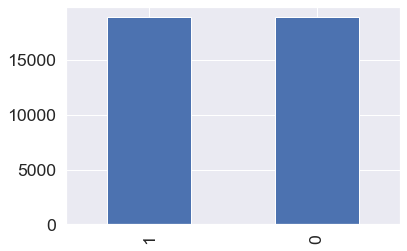

In [140]:
#Class ratios after over sampling?
y_train_over.sum()/len(y_train_over)
pd.Series(y_train_over).value_counts().plot.bar()

0.5

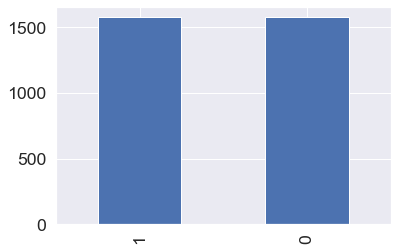

In [141]:
#Class ratios after under sampling?
y_train_under.sum()/len(y_train_under)
pd.Series(y_train_under).value_counts().plot.bar()

In [142]:
X_train.shape
X_test.shape
X_train.head()
X_test.head()

(20499, 16)

(8786, 16)

,aon,days_rech_ga,onnet_mou_ga,offnet_mou_ga,loc_og_t2t_mou_ga,loc_og_t2m_mou_ga,std_og_t2m_mou_ga,loc_ic_t2t_mou_ga,loc_ic_t2m_mou_ga,loc_ic_t2f_mou_ga,std_ic_t2m_mou_ga,total_rech_num_ga,spl_og_mou_ga,loc_og_t2f_mou_ga,std_ic_t2t_mou_ga,std_og_t2t_mou_ga
0,0.0517,0.4167,0.9996,0.9989,0.9998,0.9992,1.0000,0.9976,0.9988,0.9997,1.0000,0.8503,0.9998,0.9995,1.0000,0.9995
1,0.0531,0.5167,0.9999,0.9990,0.9998,0.9990,1.0000,0.1876,0.9976,0.9997,1.0000,0.9009,1.0000,0.9995,0.9997,1.0000
2,0.0019,0.5000,0.9997,0.9981,0.9999,0.9995,0.9999,0.9996,0.9987,0.9994,0.9999,0.8774,0.9999,0.9969,0.9999,0.9996
3,0.0072,0.5500,0.9995,0.9984,1.0000,0.9980,0.9999,0.9966,0.9982,0.9997,1.0000,0.9130,1.0000,0.9995,0.9998,0.9994
4,0.1125,0.4833,0.9997,0.9988,0.9992,0.9989,0.9999,0.9981,0.9986,0.9997,0.9999,0.9017,1.0000,0.9977,0.9998,0.9997


,aon,days_rech_ga,onnet_mou_ga,offnet_mou_ga,loc_og_t2t_mou_ga,loc_og_t2m_mou_ga,std_og_t2m_mou_ga,loc_ic_t2t_mou_ga,loc_ic_t2m_mou_ga,loc_ic_t2f_mou_ga,std_ic_t2m_mou_ga,total_rech_num_ga,spl_og_mou_ga,loc_og_t2f_mou_ga,std_ic_t2t_mou_ga,std_og_t2t_mou_ga
0,0.1379,0.5167,0.9994,0.9955,0.9996,0.9976,0.9997,0.9968,0.9952,0.9997,0.9997,0.8170,0.9999,0.9984,0.9463,0.7580
1,0.5327,0.5000,0.9997,0.9983,0.9998,0.9989,0.9999,0.9982,0.9981,0.9971,1.0000,0.9049,1.0000,0.9994,1.0000,0.9995
2,0.3854,0.7333,0.9995,0.9983,0.9997,0.9986,0.9999,0.9981,0.9981,0.9999,1.0000,0.9292,1.0000,0.9998,1.0000,0.9989
3,0.2193,0.4667,0.9991,0.9973,0.9994,0.9955,1.0000,0.9967,0.9979,0.9998,0.9999,0.6984,0.9996,0.9995,1.0000,0.9981
4,0.1628,0.5333,0.9996,0.9980,0.9997,0.9984,0.9999,0.9929,0.9966,0.9999,1.0000,0.9382,1.0000,1.0000,1.0000,0.9995


>**Observation**: 
- The classes become equal in terms of number observations in both over and under sampling.
- Undersampling results in loss of 85% of training data whereas Oversampling results in about 85% of increase 

<a id="4"></a>
# Model Building & Evaluation

**Approach to Modelling**: 
- Let's first create a Baseline model against which all other models in this project can be compared. The Baseline Model can be created using Logistic Regression but only after experimenting with different class balancing techniques.
- Let's then optimize model performance and try new agorithms, if needed, based on the findings from each model. 
- Finally, we'll compare all models to determine the best ones to be used for prediction and for explaining to business stakeholders

**Approach to Evaluation Criteria**: 

The Telecom company wants to reduce churn and is thus primarily cares about identifying customers that will churn which in the confusion matrix is the True Positive. So of all the customers that do churn it certainly wants to maximize the the % of these that it predicts; this is the Recall score (True Positive by False Negative).

Maximizing True Positive however has a down side which is that it also increases the False Positives i.e. customers that the model predicts will churn but do not actually churn. This creates a practical business problem because if the Telco gets a lot of false alarms from the model, it will not be able to trust/rely on the model. We therefore want to maximie the % of custoemrs that the model predicts will churn and do actually churn which is best captured in the Precision Score (True Positive by False Positive).

So in effect, we want to maximize both Precision and However. However,as explained, there is a tradeoff between True Positive and False Positive which means there is a tradeoff between Recall and Prediction. Therefore we need to take a balanced approach and will thus use a composite score F1, harmonic mean of Recall and Precision, as our evaluation criteria for this project. So, models with higher F1 score will be considered better models. 


Note: Probabilities are not generated by all algorithms such as SVM and the probabilities generated by algorithms such as Logistic Regression, Decision Trees & Random Forests mean different things so they are not comparable. Therefore, I am not using Area under ROC or Precision-Recall curve as an evaluation metric. However, I have generated these metrics/curves for building my own intution but have stuck to using F1 score as a model evaluation criteria.  

<a id="4.1"></a>
## Logistic Regression

<a id="4.1.1"></a>
### Class Balancing & Baseline Model 
Let's experiment with different types of class balancing techniques. The best of the lot will serve as the Baseline model for the rest of this project. 

#### LR for non-balanced data
Let's use the default class distribution i.e. no balancing.

In [143]:
clf0 = LogisticRegression(random_state=100,penalty='none',solver='sag')
clf0.fit(X_train,y_train)

/Users/ksami/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=100, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [144]:
#Predict on train data
y_train_pred0 = clf0.predict(X_train)
y_train_pred0_prob = clf0.predict_proba(X_train)[:,1] #Probability of churn class only

/Users/ksami/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


AUC : 0.29527376897897745 

AUROC : 0.7792421048593672 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     18923
           1       0.00      0.00      0.00      1576

    accuracy                           0.92     20499
   macro avg       0.46      0.50      0.48     20499
weighted avg       0.85      0.92      0.89     20499

[[18923     0]
 [ 1576     0]]


Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

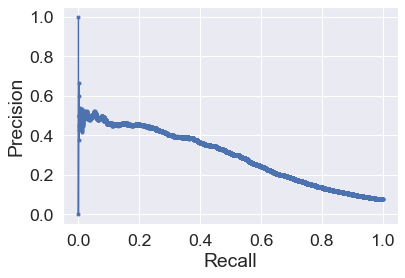

In [145]:
#Print metrics for train data
precision0, recall0, thresholds0 = precision_recall_curve(y_train, y_train_pred0_prob)

#Area under curve
print("AUC :",auc(recall0,precision0),'\n')
print("AUROC :",roc_auc_score(y_train,y_train_pred0_prob),"\n")

print(classification_report(y_train,y_train_pred0))
print(confusion_matrix(y_train,y_train_pred0))

#Plot precision-recall curve


plt.plot(recall0,precision0,marker='.')
plt.plot([0,0], [0, 0]) #Unskilled model
plt.xlabel('Recall')
plt.ylabel('Precision')

AUC : 0.045068388525243676 

AUROC : 0.21244865349958778 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8110
           1       0.00      0.00      0.00       676

    accuracy                           0.92      8786
   macro avg       0.46      0.50      0.48      8786
weighted avg       0.85      0.92      0.89      8786

[[8109    1]
 [ 676    0]]


Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

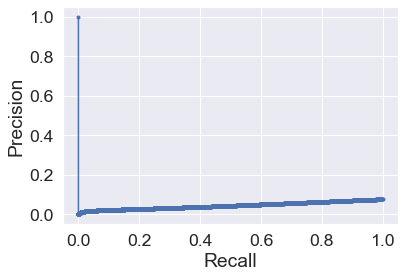

In [146]:
#Predict on test data
y_test_pred0 = clf0.predict(X_test)
y_test_pred0_prob = clf0.predict_proba(X_test)[:,0] #Probability of churn class only

#Metrics
precision0_test, recall0_test, thresholds0_test = precision_recall_curve(y_test, y_test_pred0_prob)

print("AUC :",auc(recall0_test,precision0_test),'\n')
print("AUROC :",roc_auc_score(y_test,y_test_pred0_prob),"\n")

print(classification_report(y_test,y_test_pred0))
print(confusion_matrix(y_test,y_test_pred0))

#Plot precision recall curve
plt.plot(recall0_test,precision0_test,marker='.')
plt.plot([0,0], [0, 0]) #Unskilled model
plt.xlabel('Recall')
plt.ylabel('Precision')

#### Balance using class_weight parameter
Let's balance classes using the class_weight parameter of the Logistic Regression object. This is an oversampling technique but algorithmically different from SMOTE.

In [147]:
clf1 = LogisticRegression(random_state=100,class_weight='balanced',penalty='none',solver='sag')
clf1.fit(X_train,y_train)

/Users/ksami/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None,
                   penalty='none', random_state=100, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

In [148]:
#Predict on train data
y_train_pred1 = clf1.predict(X_train)
y_train_pred1_prob = clf1.predict_proba(X_train)[:,1] #Probability of churn class only
# Use this to change probability threshold cutoff - preds = np.where(clf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

AUC : 0.2809384242442603 

AUROC : 0.7830238280651671 

              precision    recall  f1-score   support

           0       0.96      0.86      0.91     18923
           1       0.25      0.58      0.35      1576

    accuracy                           0.84     20499
   macro avg       0.61      0.72      0.63     20499
weighted avg       0.91      0.84      0.86     20499

[[16209  2714]
 [  661   915]]


Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

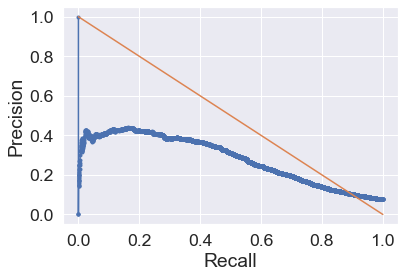

In [149]:
#Print metrics for train data
precision1, recall1, thresholds1 = precision_recall_curve(y_train, y_train_pred1_prob)

#Area under curve
print("AUC :",auc(recall1,precision1),'\n')
print("AUROC :",roc_auc_score(y_train,y_train_pred1_prob),"\n")

print(classification_report(y_train,y_train_pred1))
print(confusion_matrix(y_train,y_train_pred1))

#Plot precision-recall curve


plt.plot(recall1,precision1,marker='.')
plt.plot([0,1], [1, 0]) #Unskilled model
plt.xlabel('Recall')
plt.ylabel('Precision')

AUC : 0.29637891251340653 

AUROC : 0.7894439620893192 

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      8110
           1       0.26      0.61      0.36       676

    accuracy                           0.84      8786
   macro avg       0.61      0.73      0.63      8786
weighted avg       0.91      0.84      0.86      8786

[[6939 1171]
 [ 266  410]]


Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

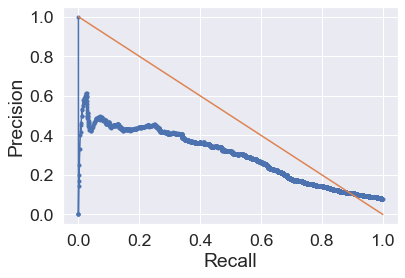

In [150]:
#Predict on test data
y_test_pred1 = clf1.predict(X_test)
y_test_pred1_prob = clf1.predict_proba(X_test)[:,1] #Probability of churn class only

#Metrics
precision1_test, recall1_test, thresholds1_test = precision_recall_curve(y_test, y_test_pred1_prob)

print("AUC :",auc(recall1_test,precision1_test),'\n')
print("AUROC :",roc_auc_score(y_test,y_test_pred1_prob),"\n")

print(classification_report(y_test,y_test_pred1))
print(confusion_matrix(y_test,y_test_pred1))

#Plot precision recall curve
plt.plot(recall1_test,precision1_test,marker='.')
plt.plot([0,1], [1, 0]) #Unskilled model
plt.xlabel('Recall')
plt.ylabel('Precision')

#### Under-sampled Dataset
Let's build a model with Near-Miss undersampled training data.

In [151]:
clf2 = LogisticRegression(random_state=100,penalty='none',solver='sag',verbose=1)

# scores = cross_val_score(clf2, X_train_under, y_train_under, scoring='f1', cv=5)
# scores.mean()

clf2.fit(X_train_under,y_train_under)

max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/ksami/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=100, solver='sag', tol=0.0001, verbose=1,
                   warm_start=False)

In [152]:
#Predict on train data
y_train_pred2 = clf2.predict(X_train_under)
y_train_pred2_prob = clf2.predict_proba(X_train_under)[:,1] #Probability of churn class only

AUC : 0.744061454290253 

AUROC : 0.6798555908423304 

              precision    recall  f1-score   support

           0       0.62      0.80      0.70      1576
           1       0.72      0.51      0.60      1576

    accuracy                           0.66      3152
   macro avg       0.67      0.66      0.65      3152
weighted avg       0.67      0.66      0.65      3152

[[1256  320]
 [ 765  811]]


Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

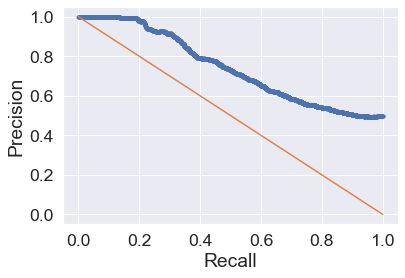

In [153]:
#Print metrics for train data
precision2, recall2, thresholds2 = precision_recall_curve(y_train_under, y_train_pred2_prob)

#Area under curve
print("AUC :",auc(recall2,precision2),'\n')
print("AUROC :",roc_auc_score(y_train_under,y_train_pred2_prob),"\n")

print(classification_report(y_train_under,y_train_pred2))
print(confusion_matrix(y_train_under,y_train_pred2))

#Plot precision-recall curve


plt.plot(recall2,precision2,marker='.')
plt.plot([0,1], [1, 0]) #Unskilled model
plt.xlabel('Recall')
plt.ylabel('Precision')

AUC : 0.060057639700776995
AUROC : 0.4106589133147039 

              precision    recall  f1-score   support

           0       0.90      0.35      0.50      8110
           1       0.06      0.52      0.11       676

    accuracy                           0.36      8786
   macro avg       0.48      0.44      0.31      8786
weighted avg       0.83      0.36      0.47      8786

[[2847 5263]
 [ 323  353]]


Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

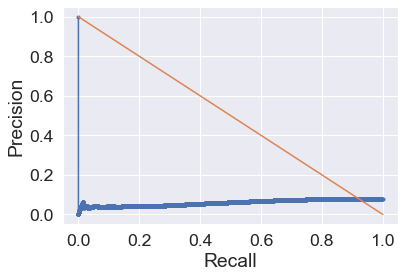

In [154]:
#Predict on test data
y_test_pred2 = clf2.predict(X_test)
y_test_pred2_prob = clf2.predict_proba(X_test)[:,1] #Probability of churn class only

#Metrics
precision2_test, recall2_test, thresholds2_test = precision_recall_curve(y_test, y_test_pred2_prob)

print("AUC :",auc(recall2_test,precision2_test))
print("AUROC :",roc_auc_score(y_test,y_test_pred2_prob),"\n")

print(classification_report(y_test,y_test_pred2))
print(confusion_matrix(y_test,y_test_pred2))

#Plot precision recall curve
plt.plot(recall2_test,precision2_test,marker='.')
plt.plot([0,1], [1, 0]) #Unskilled model
plt.xlabel('Recall')
plt.ylabel('Precision')

#### Over-sampled Dataset
Let's now use the SMOTE oversampled training data

In [155]:
clf3 = LogisticRegression(random_state=100,penalty='none',solver='sag')
clf3.fit(X_train_over,y_train_over)

/Users/ksami/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=100, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [156]:
#Predict on train data
y_train_pred3 = clf3.predict(X_train_over)
y_train_pred3_prob = clf3.predict_proba(X_train_over)[:,1] #Probability  churn class 

AUC : 0.7910281073655693
AUROC : 0.7956277214297593 

              precision    recall  f1-score   support

           0       0.74      0.70      0.72     18923
           1       0.71      0.75      0.73     18923

    accuracy                           0.73     37846
   macro avg       0.73      0.73      0.73     37846
weighted avg       0.73      0.73      0.73     37846

[[13223  5700]
 [ 4639 14284]]


Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

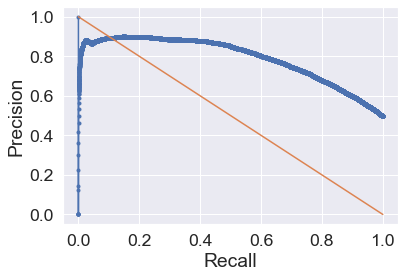

In [157]:
#Print metrics for train data
precision3, recall3, thresholds3 = precision_recall_curve(y_train_over, y_train_pred3_prob)

#Area under curve
print("AUC :",auc(recall3,precision3))
print("AUROC :",roc_auc_score(y_train_over,y_train_pred3_prob),"\n")

print(classification_report(y_train_over,y_train_pred3))
print(confusion_matrix(y_train_over,y_train_pred3))

#Plot precision-recall curve
plt.plot(recall3,precision3,marker='.')
plt.plot([0,1], [1, 0]) #Unskilled model
plt.xlabel('Recall')
plt.ylabel('Precision')

In [158]:
#Predict on test data
y_test_pred3 = clf3.predict(X_test)
y_test_pred3_prob = clf3.predict_proba(X_test)[:,1] #Probability of churn class

#Metrics for test data
precision3_test, recall3_test, thresholds3_test = precision_recall_curve(y_test, y_test_pred3_prob)

print("AUC :",auc(recall3_test,precision3_test),"\n") #Area under curve
print("AUROC :",roc_auc_score(y_test,y_test_pred3_prob),"\n")


print(classification_report(y_test,y_test_pred3))
print(confusion_matrix(y_test,y_test_pred3))

AUC : 0.2893656301248372 

AUROC : 0.7877330200862402 

              precision    recall  f1-score   support

           0       0.97      0.70      0.81      8110
           1       0.17      0.73      0.27       676

    accuracy                           0.70      8786
   macro avg       0.57      0.71      0.54      8786
weighted avg       0.91      0.70      0.77      8786

[[5642 2468]
 [ 181  495]]


>**Baseline Model Observation**: Logistic Regresion using oversampled data (using SMOTE) produced the best model with an F1 score of 0.27. **This model will act as our baseline model for the rest of this project.**

<a id="4.1.2"></a>
### Optimum Probability Threshold
Let's find the optimum probability threshold cut-off using the precision-recall curve

Text(0.5, 0, 'Probability Thresholds')

Text(0, 0.5, 'Precision & Recall')

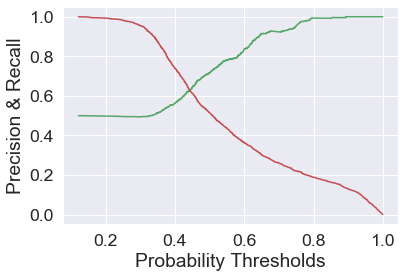

In [159]:
#Plot precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_train_under, y_train_pred2_prob)

plt.plot(thresholds, precision[:-1], "g-") #Precision is Green
plt.plot(thresholds, recall[:-1], "r-") #Recall is Red
plt.xlabel("Probability Thresholds")
plt.ylabel("Precision & Recall")
plt.show()

>**Observation**: The optimum probability threhold cut-off appears to be slightly less than 0.5. As 0.5 is the cut-off in use in the Logistic Regression, let's leave it as is.

<a id="4.1.3"></a>
### Dimensionality Reduction with PCA
Let's use Principal Component Analysis to reduce dimensions and apply the top components with maximum cumulative variance to our baseline model.

In [168]:
pca = PCA(svd_solver='randomized',random_state=100)

In [169]:
pca.fit(X_train_over)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='randomized', tol=0.0, whiten=False)

In [170]:
pca_df=pd.DataFrame(pca.components_)

In [171]:
pca.explained_variance_ratio_

array([0.57282422, 0.16537589, 0.08151135, 0.04413001, 0.04203655,
       0.03240387, 0.01719462, 0.01504516, 0.01198396, 0.00686422,
       0.00419868, 0.00207935, 0.00156273, 0.00137502, 0.00071341,
       0.00070097])

Text(0.5, 0, 'number of components')

Text(0, 0.5, 'cumulative explained variance')

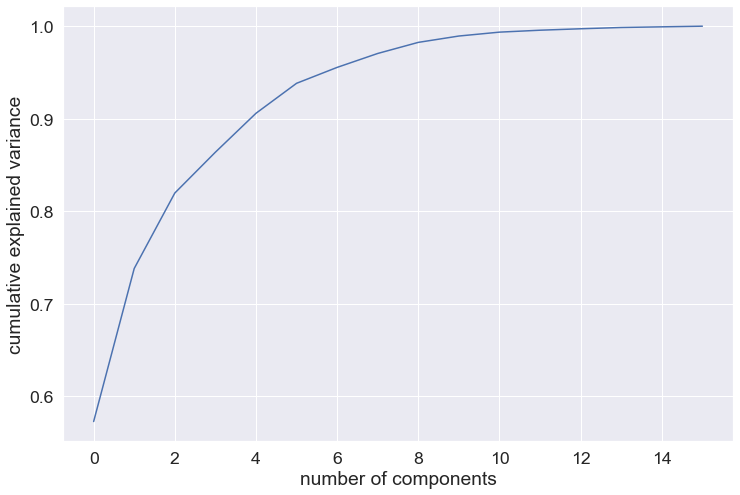

In [172]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

>**Observations**: 97% of the variance is explained by first 7 components. Let's use these top 7 components moving forward

In [173]:
#Transform the train and test features into top components
pca_incremental = IncrementalPCA(n_components=7) 

X_train_pca = pca_incremental.fit_transform(X_train_over)
X_test_pca = pca_incremental.transform(X_test)

In [174]:
#Outcome?
X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)

X_train_pca.head()

X_train_pca.shape
X_test_pca.shape

,0,1,2,3,4,5,6
0,-0.1627,-0.1153,0.0083,-0.0003,-0.0368,0.0388,0.0147
1,-0.1668,-0.0279,-0.6196,0.5063,0.0366,-0.0094,0.0223
2,-0.2123,-0.0283,0.0084,-0.0016,-0.0286,0.0301,0.0130
3,-0.2077,0.0265,0.0073,0.0013,-0.0044,0.0169,0.0096
4,-0.1030,-0.0418,0.0107,0.0012,-0.0029,0.0135,0.0099


(37846, 7)

(8786, 7)

Let's now build and test a model using the top PCA components and using the parameters of the baseline model

In [175]:
#Build model
clf11 = LogisticRegression(random_state=100,verbose=1,penalty='none',solver='sag')
clf11.fit(X_train_pca,y_train_over)

y_train_over_pred11 = clf11.predict(X_train_pca)
y_train_over_pred11_prob = clf11.predict_proba(X_train_pca)[:,1] #Probability of churn class

convergence after 24 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=100, solver='sag', tol=0.0001, verbose=1,
                   warm_start=False)


AUC : 0.7832429050060019 

AUROC : 0.7830487673046875 

[[13102  5821]
 [ 4957 13966]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71     18923
           1       0.71      0.74      0.72     18923

    accuracy                           0.72     37846
   macro avg       0.72      0.72      0.72     37846
weighted avg       0.72      0.72      0.72     37846



Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

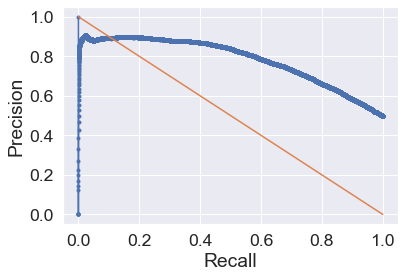

In [176]:
#Metrics for train data
precision11, recall11, thresholds11 = precision_recall_curve(y_train_over, y_train_over_pred11_prob)


print("\nAUC :",auc(recall11,precision11),"\n") #Area under curve
print("AUROC :",roc_auc_score(y_train_over, y_train_over_pred11_prob),"\n")
print(confusion_matrix(y_train_over,y_train_over_pred11))
print(classification_report(y_train_over,y_train_over_pred11))


#Plot precision-recall curve
plt.plot(recall11,precision11,marker='.')
plt.plot([0,1], [1, 0]) #Unskilled model
plt.xlabel('Recall')
plt.ylabel('Precision')



AUC : 0.2873729389116717 

AUROC : 0.7831610839127675 

              precision    recall  f1-score   support

           0       0.97      0.69      0.80      8110
           1       0.16      0.73      0.27       676

    accuracy                           0.69      8786
   macro avg       0.57      0.71      0.54      8786
weighted avg       0.91      0.69      0.76      8786

[[5582 2528]
 [ 185  491]]


Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

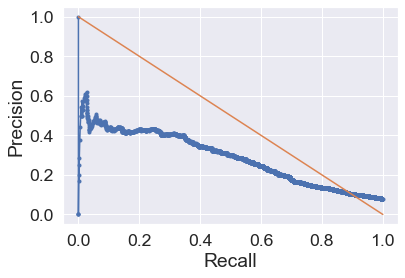

In [177]:
#Predict on test data
y_test_pred11 = clf11.predict(X_test_pca)
y_test_pred11_prob = clf11.predict_proba(X_test_pca)[:,1] #Probability of churn class

#Metrics for test data
precision11_test, recall11_test, thresholds11_test = precision_recall_curve(y_test, y_test_pred11_prob)

print("AUC :",auc(recall11_test,precision11_test),'\n')
print("AUROC :",roc_auc_score(y_test,y_test_pred11_prob),"\n")
print(classification_report(y_test,y_test_pred11))
print(confusion_matrix(y_test,y_test_pred11))


#Plot precision-recall curve
plt.plot(recall11_test,precision11_test,marker='.')
plt.plot([0,1], [1, 0]) #Unskilled model
plt.xlabel('Recall')
plt.ylabel('Precision')

>**Observation**: At at F1 score of 0.27 this model is not better than the baseline model in terms of performance but it certainly uses only 7 components instead of the 16 variables so it simplifies our model. As we're focused on building highly predictive models, let's continue to use PCA components for successive models.

<a id="4.1.3"></a>
### Hyperparameter tuning of Logistic Regression
Let's tune the hyperparameter of the regression models using PCA components to ensure generalizability of model and to maximize performance

In [178]:
# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# parameters to build the model on
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'penalty':['l1','l2']
}

# instantiate the model
lr = LogisticRegression(random_state = 100)

# fit tree on training data
grid_cv_lr1 = GridSearchCV(lr, param_grid, 
                    cv=n_folds, 
                   scoring="f1",
                   return_train_score=True,
                    verbose = 1)

grid_cv_lr1.fit(X_train_pca, y_train_over)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=100, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=1)

In [179]:
cv_results = pd.DataFrame(grid_cv_lr1.cv_results_)
cv_results[['params','mean_test_score','rank_test_score','mean_train_score']]

,params,mean_test_score,rank_test_score,mean_train_score
0,"{'C': 0.1, 'penalty': 'l1'}",0.7214,2,0.7219
1,"{'C': 0.1, 'penalty': 'l2'}",0.7185,10,0.7188
2,"{'C': 1, 'penalty': 'l1'}",0.7210,9,0.7218
3,"{'C': 1, 'penalty': 'l2'}",0.7219,1,0.7222
4,"{'C': 10, 'penalty': 'l1'}",0.7210,7,0.7218
5,"{'C': 10, 'penalty': 'l2'}",0.7210,8,0.7218
6,"{'C': 100, 'penalty': 'l1'}",0.7212,4,0.7217
7,"{'C': 100, 'penalty': 'l2'}",0.7211,6,0.7217
8,"{'C': 1000, 'penalty': 'l1'}",0.7212,3,0.7217
9,"{'C': 1000, 'penalty': 'l2'}",0.7212,4,0.7217


In [180]:
# printing the optimal accuracy score and hyperparameters
print("Best F1 score", grid_cv_lr1.best_score_)
print(grid_cv_lr1.best_estimator_)

Best F1 score 0.7218957981071495
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=100, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


>**Observation**: The best LR model has C=1 and uses L2 regularization which prima facie indicates a need to regularize the Logistic Regression model. However, the mean test and train scores for various C &  L1/L2 are all 0.72 and differ only by the 3rd decimal which indicates that Regularization will not make much of a difference at all. Let's run the model on our train & test set to confirmed.

>For refernce, the model parameters obtained are - C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=100, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False

Running the model with best parameters obtained from grid search.

In [181]:
# model with optimal hyperparameters
clf_lr_reg = grid_cv_lr1.best_estimator_
clf_lr_reg.fit(X_train_pca,y_train_over)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=100, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


AUC : 0.7822518909914585 

AUROC : 0.7827350943202404 

[[13083  5840]
 [ 4934 13989]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71     18923
           1       0.71      0.74      0.72     18923

    accuracy                           0.72     37846
   macro avg       0.72      0.72      0.72     37846
weighted avg       0.72      0.72      0.72     37846



Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

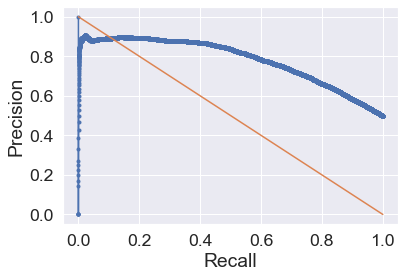

In [182]:
#Predict on train data
y_train_pred_lr_reg = clf_lr_reg.predict(X_train_pca)
y_train_pred_lr_reg_prob = clf_lr_reg.predict_proba(X_train_pca)[:,1] #Probability of churn class

#Metrics for train data
precision_lr_reg, recall_lr_reg, thresholds_lr_reg = precision_recall_curve(y_train_over, y_train_pred_lr_reg_prob)


print("\nAUC :",auc(recall_lr_reg,precision_lr_reg),"\n") #Area under curve
print("AUROC :",roc_auc_score(y_train_over, y_train_pred_lr_reg_prob),"\n")
print(confusion_matrix(y_train_over,y_train_pred_lr_reg))
print(classification_report(y_train_over,y_train_pred_lr_reg))


#Plot precision-recall curve
plt.plot(recall_lr_reg,precision_lr_reg,marker='.')
plt.plot([0,1], [1, 0]) #Unskilled model
plt.xlabel('Recall')
plt.ylabel('Precision')




AUC : 0.2856957916327316 

AUROC : 0.7827742067284893 

[[5565 2545]
 [ 185  491]]
              precision    recall  f1-score   support

           0       0.97      0.69      0.80      8110
           1       0.16      0.73      0.26       676

    accuracy                           0.69      8786
   macro avg       0.56      0.71      0.53      8786
weighted avg       0.91      0.69      0.76      8786



Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

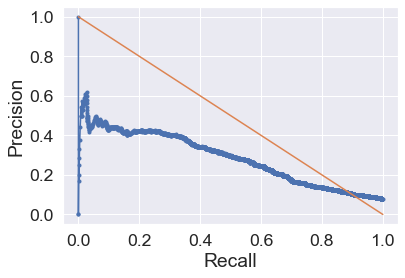

In [183]:
#Predict on test data
y_test_pred_lr_reg = clf_lr_reg.predict(X_test_pca)
y_test_pred_lr_reg_prob = clf_lr_reg.predict_proba(X_test_pca)[:,1] #Probability of churn class

#Metrics for test data
precision_lr_reg, recall_lr_reg, thresholds_lr_reg = precision_recall_curve(y_test, y_test_pred_lr_reg_prob)


print("\nAUC :",auc(recall_lr_reg,precision_lr_reg),"\n") #Area under curve
print("AUROC :",roc_auc_score(y_test, y_test_pred_lr_reg_prob),"\n")
print(confusion_matrix(y_test,y_test_pred_lr_reg))
print(classification_report(y_test,y_test_pred_lr_reg))


#Plot precision-recall curve
plt.plot(recall_lr_reg,precision_lr_reg,marker='.')
plt.plot([0,1], [1, 0]) #Unskilled model
plt.xlabel('Recall')
plt.ylabel('Precision')

**Observation**: Regularization has not really impact performance. Infact, at at F1 score of 0.26, this model performs slightly worse than the baseline non-regularized LR model.

<a id="4.1.4"></a>
### Generalized Regression using Polynomial Features
Let's transform the 16 variables into polynomial variations of degree 1 through 5. This will help us understand the nature of the relationships with the predictors.

In [197]:
#Comparing linear, quadratic and cubic features 

f1_train = []
f1_test = []
degrees = [1,2,3,4,5]

for degree in degrees:
    pipeline = Pipeline([('poly_features', PolynomialFeatures(degree=degree)),
                     ('model', LogisticRegression(random_state=100,penalty='none',solver='sag',verbose=1))])
    pipeline.fit(X_train_over, y_train_over)
    
    # training performance
    f1_train.append(f1_score(y_train_over, pipeline.predict(X_train_over)))
        
    # testing performance
    f1_test.append(f1_score(y_test, pipeline.predict(X_test)))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds


/Users/ksami/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='none', random_state=100,
                                    solver='sag', tol=0.0001, verbose=1,
                                    warm_start=False))],
         verbose=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 5 seconds


/Users/ksami/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s finished


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='none', random_state=100,
                                    solver='sag', tol=0.0001, verbose=1,
                                    warm_start=False))],
         verbose=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 25 seconds


/Users/ksami/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.2s finished


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='none', random_state=100,
                                    solver='sag', tol=0.0001, verbose=1,
                                    warm_start=False))],
         verbose=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 117 seconds


/Users/ksami/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9min finished


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='none', random_state=100,
                                    solver='sag', tol=0.0001, verbose=1,
                                    warm_start=False))],
         verbose=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 474 seconds


/Users/ksami/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.9min finished


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=5, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='none', random_state=100,
                                    solver='sag', tol=0.0001, verbose=1,
                                    warm_start=False))],
         verbose=False)

In [198]:
#Create dataframe for f1 scores for each degree
poly_scores = pd.DataFrame()

poly_scores['degree'] = degrees
poly_scores['f1_test'] = f1_test
poly_scores['f1_train'] = f1_train


In [199]:
poly_scores

,degree,f1_test,f1_train
0,1,0.2705,0.7342
1,2,0.2942,0.7387
2,3,0.3058,0.7437
3,4,0.3136,0.7494
4,5,0.3189,0.7532


>**Observation**: Increase in degree results in improved performance. This means the relationship between some variables and churn is not linear. 

> **Action**: As the variable relationship is non-linear the decision boundaries would be non-linear too. Decision Trees and SVM work better in such a case so let's build models with them instead of trying to fit a Logistic Regression on polynomial features. 

<a id="4.2"></a>
## Decision Tree Models

>**Approach**: Decision trees are bound to overfit so let's tune a basic model with max_depth=3 followed by hyperparameter tuning. We'll also use Ensemble tree model (Random Forests) to improve model performance.

<a id="4.2.1"></a>
### Basic DT Model

In [184]:
# model with optimal hyperparameters
clf_dt1 = DecisionTreeClassifier(random_state=100,max_depth=3)

clf_dt1.fit(X_train_pca, y_train_over)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')


AUC : 0.8108713894256121 

AUROC : 0.7934501154349816 

[[14847  4076]
 [ 5609 13314]]
              precision    recall  f1-score   support

           0       0.73      0.78      0.75     18923
           1       0.77      0.70      0.73     18923

    accuracy                           0.74     37846
   macro avg       0.75      0.74      0.74     37846
weighted avg       0.75      0.74      0.74     37846



Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

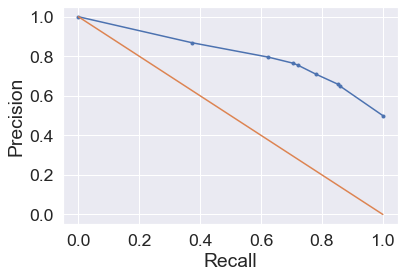

In [185]:
#Predict on train data
y_train_preddt_pca = clf_dt1.predict(X_train_pca)
y_train_preddt_pca_prob = clf_dt1.predict_proba(X_train_pca)[:,1] #Probability of churn class

#Metrics for train data
precisiondt_pca, recalldt_pca, thresholdsdt_pca = precision_recall_curve(y_train_over, y_train_preddt_pca_prob)


print("\nAUC :",auc(recalldt_pca,precisiondt_pca),"\n") #Area under curve
print("AUROC :",roc_auc_score(y_train_over, y_train_preddt_pca_prob),"\n")
print(confusion_matrix(y_train_over,y_train_preddt_pca))
print(classification_report(y_train_over,y_train_preddt_pca))


#Plot precision-recall curve
plt.plot(recalldt_pca,precisiondt_pca,marker='.')
plt.plot([0,1], [1, 0]) #Unskilled model
plt.xlabel('Recall')
plt.ylabel('Precision')




AUC : 0.3754894530402734 

AUROC : 0.7891518433667253 

[[6323 1787]
 [ 209  467]]
              precision    recall  f1-score   support

           0       0.97      0.78      0.86      8110
           1       0.21      0.69      0.32       676

    accuracy                           0.77      8786
   macro avg       0.59      0.74      0.59      8786
weighted avg       0.91      0.77      0.82      8786



Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

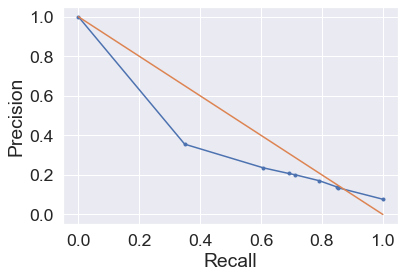

In [186]:
#Predict on test data
y_test_preddt_pca = clf_dt1.predict(X_test_pca)
y_test_preddt_pca_prob = clf_dt1.predict_proba(X_test_pca)[:,1] #Probability of churn class

#Metrics for test data
precisiondt_pca, recalldt_pca, thresholdsdt_pca = precision_recall_curve(y_test, y_test_preddt_pca_prob)

print("\nAUC :",auc(recalldt_pca,precisiondt_pca),"\n") #Area under curve
print("AUROC :",roc_auc_score(y_test, y_test_preddt_pca_prob),"\n")
print(confusion_matrix(y_test,y_test_preddt_pca))
print(classification_report(y_test,y_test_preddt_pca))


#Plot precision-recall curve
plt.plot(recalldt_pca,precisiondt_pca,marker='.')
plt.plot([0,1], [1, 0]) #Unskilled model
plt.xlabel('Recall')
plt.ylabel('Precision')

> **Observation & Action**: So far this is the best performing model with F1 score of 0.32! Let's try and improve this with an ensemble model using Random Forest Classifier.

<a id="4.2.2"></a>
### Hyperparameter tuning of Decision Tree Classifier 
Let's find the best combination of hyperparameters

In [187]:
# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# parameters to build the model on
param_grid = {
    'max_depth': range(2, 14, 2),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

# instantiate the model
dtree = DecisionTreeClassifier(random_state = 100)

# fit tree on training data
grid_cv_dt2 = GridSearchCV(dtree, param_grid, 
                    cv=n_folds, 
                   scoring="f1",
                   return_train_score=True,
                    verbose = 1)

grid_cv_dt2.fit(X_train_pca, y_train_over)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   39.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
       

In [188]:
cv_results_dt2 = pd.DataFrame(grid_cv_dt2.cv_results_)
cv_results_dt2[['params','mean_test_score','rank_test_score','mean_train_score']]

,params,mean_test_score,rank_test_score,mean_train_score
0,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.7381,45,0.7390
1,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.7381,45,0.7390
2,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.7381,45,0.7390
3,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.7381,45,0.7390
4,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.7433,33,0.7466
5,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.7433,33,0.7466
6,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.7429,35,0.7459
7,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.7429,35,0.7459
8,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.7597,27,0.7693
9,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.7597,27,0.7693


In [189]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_cv_dt2.best_score_)
print(grid_cv_dt2.best_estimator_)

best accuracy 0.7897265017127258
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=12,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')


>**Observation**: The best decision tree model has a max_depth of 12. This isn't great for interpretation but let's focus on prediction accuracy for now.

>For reference, the optimum parameters are - class_weight=None, criterion='entropy', max_depth=12,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best'

Running the model with best parameters obtained from grid search.

In [190]:
# model with optimal hyperparameters
clf_dt2 = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=50, min_samples_split=50, min_weight_fraction_leaf=0.0, presort=False, random_state=100, splitter='best')

clf_dt2.fit(X_train_pca, y_train_over)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')


AUC : 0.8108697119924635 

AUROC : 0.7934664246428623 

[[14847  4076]
 [ 5609 13314]]
              precision    recall  f1-score   support

           0       0.73      0.78      0.75     18923
           1       0.77      0.70      0.73     18923

    accuracy                           0.74     37846
   macro avg       0.75      0.74      0.74     37846
weighted avg       0.75      0.74      0.74     37846



Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

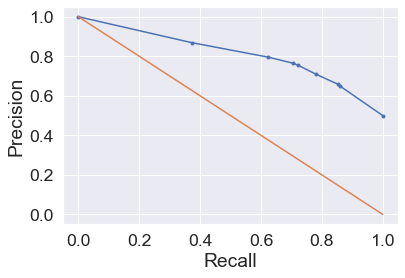

In [191]:
#Predict on train data
y_train_pred_dt_tuned = clf_dt2.predict(X_train_pca)
y_train_pred_dt_tuned_prob = clf_dt2.predict_proba(X_train_pca)[:,1] #Probability of churn class

#Metrics for train data
precision_dt_tuned, recall_dt_tuned, thresholds_dt_tuned = precision_recall_curve(y_train_over, y_train_pred_dt_tuned_prob)


print("\nAUC :",auc(recall_dt_tuned,precision_dt_tuned),"\n") #Area under curve
print("AUROC :",roc_auc_score(y_train_over, y_train_pred_dt_tuned_prob),"\n")
print(confusion_matrix(y_train_over,y_train_pred_dt_tuned))
print(classification_report(y_train_over,y_train_pred_dt_tuned))


#Plot precision-recall curve
plt.plot(recall_dt_tuned,precision_dt_tuned,marker='.')
plt.plot([0,1], [1, 0]) #Unskilled model
plt.xlabel('Recall')
plt.ylabel('Precision')




AUC : 0.3754894530402734 

AUROC : 0.7891518433667253 

[[6323 1787]
 [ 209  467]]
              precision    recall  f1-score   support

           0       0.97      0.78      0.86      8110
           1       0.21      0.69      0.32       676

    accuracy                           0.77      8786
   macro avg       0.59      0.74      0.59      8786
weighted avg       0.91      0.77      0.82      8786



Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

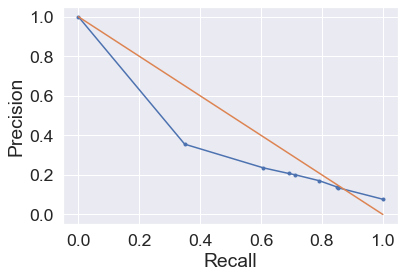

In [192]:
#Predict on test data
y_test_pred_dt_tuned = clf_dt1.predict(X_test_pca)
y_test_pred_dt_tuned_prob = clf_dt1.predict_proba(X_test_pca)[:,1] #Probability of churn class

#Metrics for test data
precision_dt_tuned, recall_dt_tuned, thresholds_dt_tuned = precision_recall_curve(y_test, y_test_pred_dt_tuned_prob)

print("\nAUC :",auc(recall_dt_tuned,precision_dt_tuned),"\n") #Area under curve
print("AUROC :",roc_auc_score(y_test, y_test_pred_dt_tuned_prob),"\n")
print(confusion_matrix(y_test,y_test_pred_dt_tuned))
print(classification_report(y_test,y_test_pred_dt_tuned))


#Plot precision-recall curve
plt.plot(recall_dt_tuned,precision_dt_tuned,marker='.')
plt.plot([0,1], [1, 0]) #Unskilled model
plt.xlabel('Recall')
plt.ylabel('Precision')

> **Observation & Action**: The performance of the tuned model is the same as the previous decision tree model. Let's now try an ensemble of decision trees i.e. Random Forests

<a id="4.2.3"></a>
### Random Forests - Basic Model
Let's build out a basic random forest classifier

In [193]:
#Balance non-scaled dataset
# X_train_rf, y_train_rf = over_sampler.fit_sample(X_train_notscaled, y_train)

In [194]:
clf_rf1 = RandomForestClassifier(random_state=100)
clf_rf1.fit(X_train_pca,y_train_over)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)


AUC : 0.9998708906287225 

AUROC : 0.999869762317787 

[[18862    61]
 [  138 18785]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18923
           1       1.00      0.99      0.99     18923

    accuracy                           0.99     37846
   macro avg       0.99      0.99      0.99     37846
weighted avg       0.99      0.99      0.99     37846



Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

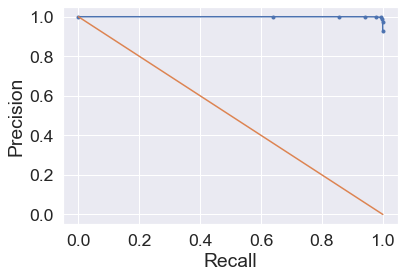

In [195]:
#Predict on train data
y_train_pred_rf1 = clf_rf1.predict(X_train_pca)
y_train_pred_rf1_prob = clf_rf1.predict_proba(X_train_pca)[:,1]

#Metrics for train data
precision_rf1, recall_rf1, thresholds_rf1 = precision_recall_curve(y_train_over, y_train_pred_rf1_prob)


print("\nAUC :",auc(recall_rf1,precision_rf1),"\n") #Area under curve
print("AUROC :",roc_auc_score(y_train_over, y_train_pred_rf1_prob),"\n")

print(confusion_matrix(y_train_over,y_train_pred_rf1))
print(classification_report(y_train_over,y_train_pred_rf1))


#Plot precision-recall curve
plt.plot(recall_rf1,precision_rf1,marker='.')
plt.plot([0,1], [1, 0]) #Unskilled model
plt.xlabel('Recall')
plt.ylabel('Precision')

AUC : 0.3733236498249508 

AUROC : 0.8015540752522636 

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      8110
           1       0.32      0.52      0.40       676

    accuracy                           0.88      8786
   macro avg       0.64      0.71      0.66      8786
weighted avg       0.91      0.88      0.89      8786

[[7369  741]
 [ 325  351]]


Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

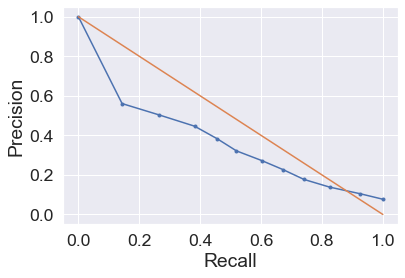

In [196]:
#Predict on test data
y_test_pred_rf1 = clf_rf1.predict(X_test_pca)
y_test_pred_rf1_prob = clf_rf1.predict_proba(X_test_pca)[:,1]

#Metrics for test data
precision_rf1_test, recall_rf1_test, thresholds_rf1_test = precision_recall_curve(y_test, y_test_pred_rf1_prob)

print("AUC :",auc(recall_rf1_test,precision_rf1_test),'\n')
print("AUROC :",roc_auc_score(y_test,y_test_pred_rf1_prob),"\n")
print(classification_report(y_test,y_test_pred_rf1))
print(confusion_matrix(y_test,y_test_pred_rf1))


#Plot precision-recall curve
plt.plot(recall_rf1_test,precision_rf1_test,marker='.')
plt.plot([0,1], [1, 0]) #Unskilled model
plt.xlabel('Recall')
plt.ylabel('Precision')

>**Observation & Action** - Random Forsts has improved the F1 score to 0.41, the best so far. Let's try to tune its hyperparameters. 

<a id="4.2.4"></a>
### Hyperparameter tuning of Random Forests

In [410]:
X_train_pca.shape

(37846, 7)

In [411]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200], 
    'max_features': range(1,7)
}
# Create a based model
rf = RandomForestClassifier(random_state=100,warm_start=True)

#Cross validation
n_folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = n_folds, n_jobs = -1,verbose = 1,return_train_score=True)



In [412]:
# Fit the grid search to the data
grid_search_rf.fit(X_train_pca, y_train_over)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  7.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fracti...
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=True),
  

In [413]:
rf_scores2 = pd.DataFrame(grid_search_rf.cv_results_)
rf_scores2[['params','mean_test_score','rank_test_score','mean_train_score']]

,params,mean_test_score,rank_test_score,mean_train_score
0,"{'max_features': 1, 'min_samples_leaf': 100, '...",0.7263,211,0.7379
1,"{'max_features': 1, 'min_samples_leaf': 100, '...",0.7499,194,0.7595
2,"{'max_features': 1, 'min_samples_leaf': 100, '...",0.7670,92,0.7748
3,"{'max_features': 1, 'min_samples_leaf': 100, '...",0.7688,81,0.7794
4,"{'max_features': 1, 'min_samples_leaf': 100, '...",0.7712,78,0.7816
5,"{'max_features': 1, 'min_samples_leaf': 100, '...",0.7754,67,0.7857
6,"{'max_features': 1, 'min_samples_leaf': 100, '...",0.7755,66,0.7859
7,"{'max_features': 1, 'min_samples_leaf': 100, '...",0.7750,68,0.7847
8,"{'max_features': 1, 'min_samples_leaf': 100, '...",0.7756,64,0.7853
9,"{'max_features': 1, 'min_samples_leaf': 100, '...",0.7175,214,0.7231


In [414]:
# printing the optimal accuracy score and hyperparameters
# print("Best OOB score", grid_search_rf.best_score_)
print(grid_search_rf.best_estimator_)

Best OOB score 0.7899910162236432
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=True)


>**Note**: The best fit RF seen here uses 200 trees. In a previous iteration not seen here, I'd run an RF for 500 trees but it does not produce a better result but takes up to 1 hour to tune so I've removed it.

>For reference, the best fit hyperparameters are bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=True

Fitting the final model with the best parameters obtained from grid search.

In [421]:
clf_rf2 = grid_search_rf.best_estimator_
clf_rf2

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=True)

In [422]:
#Fit on train data
clf_rf2.fit(X_train_pca,y_train_over)

/Users/ksami/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:307: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=True)

In [423]:
#Predict on train data
y_train_pred_rf2 = clf_rf2.predict(X_train_pca)
y_train_pred_rf2_prob = clf_rf2.predict_proba(X_train_pca)[:,1]


AUC : 0.8946051808330668 

AUROC : 0.8948134705422152 

[[15782  3141]
 [ 4137 14786]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81     18923
           1       0.82      0.78      0.80     18923

    accuracy                           0.81     37846
   macro avg       0.81      0.81      0.81     37846
weighted avg       0.81      0.81      0.81     37846



Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

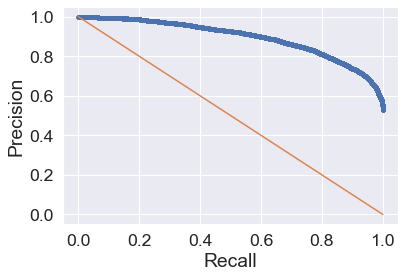

In [424]:
#Metrics for train data
precision_rf2, recall_rf2, thresholds_rf2 = precision_recall_curve(y_train_over, y_train_pred_rf2_prob)


print("\nAUC :",auc(recall_rf2,precision_rf2),"\n") #Area under curve
print("AUROC :",roc_auc_score(y_train_over, y_train_pred_rf2_prob),"\n")

print(confusion_matrix(y_train_over,y_train_pred_rf2))
print(classification_report(y_train_over,y_train_pred_rf2))


#Plot precision-recall curve
plt.plot(recall_rf2,precision_rf2,marker='.')
plt.plot([0,1], [1, 0]) #Unskilled model
plt.xlabel('Recall')
plt.ylabel('Precision')

In [425]:
#Predict on test data
y_test_pred_rf2 = clf_rf2.predict(X_test_pca)
y_test_pred_rf2_prob = clf_rf2.predict_proba(X_test_pca)[:,1]

AUC : 0.39374762093750443 

AUROC : 0.8327297915496246 

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      8110
           1       0.25      0.68      0.37       676

    accuracy                           0.82      8786
   macro avg       0.61      0.76      0.63      8786
weighted avg       0.91      0.82      0.85      8786

[[6737 1373]
 [ 214  462]]


Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

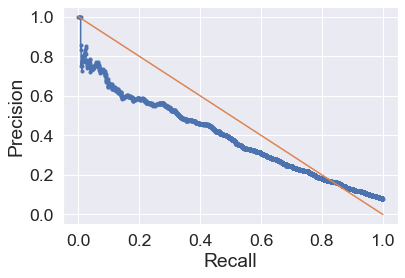

In [426]:
#Metrics for test data
precision_rf2_test, recall_rf2_test, thresholds_rf2_test = precision_recall_curve(y_test, y_test_pred_rf2_prob)

print("AUC :",auc(recall_rf2_test,precision_rf2_test),'\n')
print("AUROC :",roc_auc_score(y_test,y_test_pred_rf2_prob),"\n")
print(classification_report(y_test,y_test_pred_rf2))
print(confusion_matrix(y_test,y_test_pred_rf2))


#Plot precision-recall curve
plt.plot(recall_rf2_test,precision_rf2_test,marker='.')
plt.plot([0,1], [1, 0]) #Unskilled model
plt.xlabel('Recall')
plt.ylabel('Precision')

>**Observation**: At an F1 score of 0.37, the tuned RF model performs worse than the default hyperparmeter based RF model.

>**Action**: It is evident that Decision Tree based models perform better than Logistic Regression. This alongwith the findings of the logistic regression model run on polynomial features, indicate that the predictors most likely require a non-linear discriminator. It is therefore a good idea to try an SVM with a radial Kernel to try and improve model performance.

<a id="4.3"></a>
## Support Vector Machine (SVM) Models

<a id="4.3.1"></a>
### Basic Model
Let's start with a basic SVM model with default hyperparameters

In [336]:
# fit model on training data with default hyperparameters
model_svc = SVC(random_state=1)
model_svc.fit(X_train_pca, y_train_over)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

In [339]:
#Predict on train data
y_train_pred_svc1 = model_svc.predict(X_train_pca)
# y_train_pred_svc1_prob = model_svc.predict_proba(X_train_pca)[:,1] #Probability of churn class

#Metrics for train data
# precision_svc1, recall_svc1, thresholds_svc1 = precision_recall_curve(y_train_over, y_train_pred_svc1_prob)


# print("\nAUC :",auc(recall_svc1,precision_svc1),"\n") #Area under curve
# print("AUROC :",roc_auc_score(y_train_over, y_train_pred_svc1_prob),"\n")
print(confusion_matrix(y_train_over,y_train_pred_svc1))
print(classification_report(y_train_over,y_train_pred_svc1))


#Plot precision-recall curve
# plt.plot(recall_svc1,precision_svc1,marker='.')
# plt.plot([0,1], [1, 0]) #Unskilled model
# plt.xlabel('Recall')
# plt.ylabel('Precision')



[[13681  5242]
 [ 5332 13591]]
              precision    recall  f1-score   support

           0       0.72      0.72      0.72     18923
           1       0.72      0.72      0.72     18923

    accuracy                           0.72     37846
   macro avg       0.72      0.72      0.72     37846
weighted avg       0.72      0.72      0.72     37846



In [340]:
#Predict on test data
y_test_pred_svc1 = model_svc.predict(X_test_pca)
# y_test_pred_svc1_prob = model_svc.predict_proba(X_test_pca)[:,1] #Probability of churn class

#Metrics for test data
# precision_svc1, recall_svc1, thresholds_svc1 = precision_recall_curve(y_test, y_test_pred_svc1_prob)

# print("\nAUC :",auc(recall_svc1,precision_svc1),"\n") #Area under curve
# print("AUROC :",roc_auc_score(y_test, y_test_pred_svc1_prob),"\n")
print(confusion_matrix(y_test,y_test_pred_svc1))
print(classification_report(y_test,y_test_pred_svc1))


#Plot precision-recall curve
# plt.plot(recall_svc1,precision_svc1,marker='.')
# plt.plot([0,1], [1, 0]) #Unskilled model
# plt.xlabel('Recall')
# plt.ylabel('Precision')

[[5824 2286]
 [ 198  478]]
              precision    recall  f1-score   support

           0       0.97      0.72      0.82      8110
           1       0.17      0.71      0.28       676

    accuracy                           0.72      8786
   macro avg       0.57      0.71      0.55      8786
weighted avg       0.91      0.72      0.78      8786



>**Observation**: At at F1 score of 0.28, the performance is worst than Decision Trees but marginally better than the baseline model. Let's try tuning the hyperparameters

<a id="4.3.2"></a>
### Find Optimal Hyperparameter for SVC


In [341]:
# specify range of parameters (C & Kernel) as a list
params = {"C": [0.1, 1, 10, 100, 1000],
         'kernel':['linear', 'poly', 'rbf']}

n_folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

modelsvc = SVC(random_state=1)

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
gs_svc = GridSearchCV(estimator = modelsvc, 
                      param_grid = params, 
                      scoring= 'f1', 
                      cv = n_folds, 
                      verbose = 1,
                      return_train_score=True)      

In [342]:
# fit the model 
gs_svc.fit(X_train_pca, y_train_over) 

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 41.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'kernel': ['linear', 'poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=1)

In [351]:
# results of grid search CV
cv_results_svc = pd.DataFrame(gs_svc.cv_results_)
cv_results_svc[['params','mean_test_score','rank_test_score','mean_train_score']]

,params,mean_test_score,rank_test_score,mean_train_score
0,"{'C': 0.1, 'kernel': 'linear'}",0.7208,3,0.7206
1,"{'C': 0.1, 'kernel': 'poly'}",0.6685,14,0.6689
2,"{'C': 0.1, 'kernel': 'rbf'}",0.7165,10,0.7165
3,"{'C': 1, 'kernel': 'linear'}",0.7181,6,0.7185
4,"{'C': 1, 'kernel': 'poly'}",0.6685,14,0.6689
5,"{'C': 1, 'kernel': 'rbf'}",0.7194,5,0.7196
6,"{'C': 10, 'kernel': 'linear'}",0.7179,7,0.7184
7,"{'C': 10, 'kernel': 'poly'}",0.6744,13,0.6744
8,"{'C': 10, 'kernel': 'rbf'}",0.7205,4,0.7209
9,"{'C': 100, 'kernel': 'linear'}",0.7176,9,0.7184


Though the training accuracy monotonically increases with C, the test accuracy gradually reduces. Thus, we can conclude that higher values of C tend to **overfit** the model. This is because a high C value aims to classify all training examples correctly (since C is the *cost of misclassification* - if you impose a high cost on the model, it will avoid misclassifying any points by overfitting the data). 



In [344]:
#Best model and F1 score
gs_svc.best_score_
gs_svc.best_estimator_

0.7488236234914415

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

**Observation**: An RBF kernel optimum which confirms that the non-linearity in the variable relationships.
    
For reference - the best model is as follows: SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

Fitting the final model with the best parameters obtained from grid search.

In [345]:
# model with the best value of C
best_svc = gs_svc.best_estimator_

# fit
best_svc.fit(X_train_pca, y_train_over)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

In [349]:
#Predict on train data
y_train_pred_svc1 = best_svc.predict(X_train_pca)
# y_train_pred_svc1_prob = best_svc.predict_proba(X_train_pca)[:,1] #Probability of churn class

#Metrics for train data
# precision_svc1, recall_svc1, thresholds_svc1 = precision_recall_curve(y_train_over, y_train_pred_svc1_prob)


# print("\nAUC :",auc(recall_svc1,precision_svc1),"\n") #Area under curve
# print("AUROC :",roc_auc_score(y_train_over, y_train_pred_svc1_prob),"\n")
print(confusion_matrix(y_train_over,y_train_pred_svc1))
print(classification_report(y_train_over,y_train_pred_svc1))


#Plot precision-recall curve
# plt.plot(recall_svc1,precision_svc1,marker='.')
# plt.plot([0,1], [1, 0]) #Unskilled model
# plt.xlabel('Recall')
# plt.ylabel('Precision')



[[15029  3894]
 [ 5203 13720]]
              precision    recall  f1-score   support

           0       0.74      0.79      0.77     18923
           1       0.78      0.73      0.75     18923

    accuracy                           0.76     37846
   macro avg       0.76      0.76      0.76     37846
weighted avg       0.76      0.76      0.76     37846



In [350]:
#Predict on test data
y_test_pred_svc1 = best_svc.predict(X_test_pca)
# y_test_pred_svc1_prob = best_svc.predict_proba(X_test_pca)[:,1] #Probability of churn class

#Metrics for test data
# precision_svc1, recall_svc1, thresholds_svc1 = precision_recall_curve(y_test, y_test_pred_svc1_prob)

# print("\nAUC :",auc(recall_svc1,precision_svc1),"\n") #Area under curve
# print("AUROC :",roc_auc_score(y_test, y_test_pred_svc1_prob),"\n")
print(confusion_matrix(y_test,y_test_pred_svc1))
print(classification_report(y_test,y_test_pred_svc1))


#Plot precision-recall curve
# plt.plot(recall_svc1,precision_svc1,marker='.')
# plt.plot([0,1], [1, 0]) #Unskilled model
# plt.xlabel('Recall')
# plt.ylabel('Precision')

[[6376 1734]
 [ 199  477]]
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      8110
           1       0.22      0.71      0.33       676

    accuracy                           0.78      8786
   macro avg       0.59      0.75      0.60      8786
weighted avg       0.91      0.78      0.83      8786



>**Observation**: At at F1 score of 0.33, the model performs much better than the SVM model with default hyperparameters. So the regularization penalty of C and the non-linear kernel definitely improved model performance. The model performance is slighlty better than Decision Tree model but not as good as the Random Forests model.

**Action**: The best model we have so far is an Ensemble model i.e. Random Forsts. Therefore,let's use XGBoost which is a Sequential Ensemble / Boosting algorithm in an attempt to further improve model performance. 

<a id="4.4"></a>
## XGBoost Models

<a id="4.4.1"></a>
### Basic XGBoost Model
Let's start with a XGBoost model with default hyperparameters

In [119]:
# fit model on training data with default hyperparameters
model_xgb = XGBClassifier()
model_xgb.fit(X_train_pca, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


AUC : 0.8668638411098748 

AUROC : 0.8672275094201105 

[[15603  3320]
 [ 4658 14265]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.80     18923
           1       0.81      0.75      0.78     18923

    accuracy                           0.79     37846
   macro avg       0.79      0.79      0.79     37846
weighted avg       0.79      0.79      0.79     37846



Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

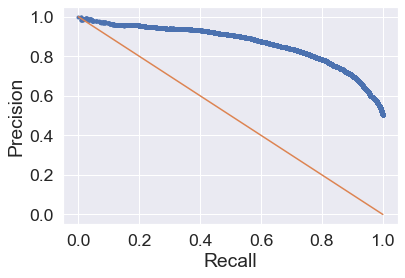

In [120]:
#Predict on train data
y_train_pred_xgb1 = model_xgb.predict(X_train_pca)
y_train_pred_xgb1_prob = model_xgb.predict_proba(X_train_pca)[:,1] #Probability of churn class

#Metrics for train data
precision_xgb1, recall_xgb1, thresholds_xgb1 = precision_recall_curve(y_train_over, y_train_pred_xgb1_prob)


print("\nAUC :",auc(recall_xgb1,precision_xgb1),"\n") #Area under curve
print("AUROC :",roc_auc_score(y_train_over, y_train_pred_xgb1_prob),"\n")
print(confusion_matrix(y_train_over,y_train_pred_xgb1))
print(classification_report(y_train_over,y_train_pred_xgb1))


#Plot precision-recall curve
plt.plot(recall_xgb1,precision_xgb1,marker='.')
plt.plot([0,1], [1, 0]) #Unskilled model
plt.xlabel('Recall')
plt.ylabel('Precision')




AUC : 0.3782291636806583 

AUROC : 0.831321638856259 

[[6632 1478]
 [ 197  479]]
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      8110
           1       0.24      0.71      0.36       676

    accuracy                           0.81      8786
   macro avg       0.61      0.76      0.63      8786
weighted avg       0.92      0.81      0.85      8786



Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

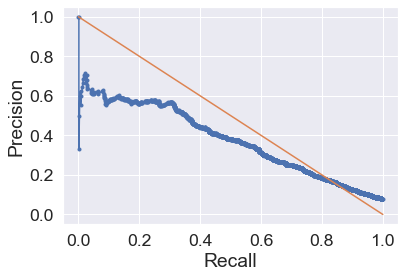

In [121]:
#Predict on test data
y_test_pred_xgb1 = model_xgb.predict(X_test_pca)
y_test_pred_xgb1_prob = model_xgb.predict_proba(X_test_pca)[:,1] #Probability of churn class

#Metrics for test data
precision_xgb1, recall_xgb1, thresholds_xgb1 = precision_recall_curve(y_test, y_test_pred_xgb1_prob)

print("\nAUC :",auc(recall_xgb1,precision_xgb1),"\n") #Area under curve
print("AUROC :",roc_auc_score(y_test, y_test_pred_xgb1_prob),"\n")
print(confusion_matrix(y_test,y_test_pred_xgb1))
print(classification_report(y_test,y_test_pred_xgb1))


#Plot precision-recall curve
plt.plot(recall_xgb1,precision_xgb1,marker='.')
plt.plot([0,1], [1, 0]) #Unskilled model
plt.xlabel('Recall')
plt.ylabel('Precision')

>**Observation & Action**: With an F1 score of 0.36, this model is not better than a Random Forest classifier. Let's try and tune XGBoost performance using hyperparameters.

<a id="4.4.2"></a>
### Hyperparameter tuning - XGBoost

In [404]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.4, 0.6, 0.9], 
             'subsample': [0.2, 0.4, 0.6, 0.9]}          


n_folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200, random_state=100)

# set up GridSearchCV()
gs_xgb = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'f1', 
                        cv = n_folds, 
                        verbose = 1,
                        return_train_score=True)      



In [405]:
# fit the model
gs_xgb.fit(X_train, y_train)       

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.4, 0.6,

In [406]:
# cv results
cv_results_xgb = pd.DataFrame(gs_xgb.cv_results_)
cv_results_xgb[['params','mean_test_score','rank_test_score','mean_train_score']]

,params,mean_test_score,rank_test_score,mean_train_score
0,"{'learning_rate': 0.2, 'subsample': 0.2}",0.4744,7,0.5265
1,"{'learning_rate': 0.2, 'subsample': 0.4}",0.4842,1,0.5366
2,"{'learning_rate': 0.2, 'subsample': 0.6}",0.4841,2,0.5383
3,"{'learning_rate': 0.2, 'subsample': 0.9}",0.4837,3,0.5441
4,"{'learning_rate': 0.4, 'subsample': 0.2}",0.4685,11,0.5502
5,"{'learning_rate': 0.4, 'subsample': 0.4}",0.4796,6,0.5690
6,"{'learning_rate': 0.4, 'subsample': 0.6}",0.4738,8,0.5819
7,"{'learning_rate': 0.4, 'subsample': 0.9}",0.4713,9,0.5908
8,"{'learning_rate': 0.6, 'subsample': 0.2}",0.4319,15,0.5305
9,"{'learning_rate': 0.6, 'subsample': 0.4}",0.4668,12,0.5847


In [400]:
#Best model and F1 score
gs_xgb.best_score_
gs_xgb.best_estimator_

0.4841730058294273

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.4, verbosity=1)

>**Observation**: The best estimator so far has an F1 score of 0.48. 

>For reference the classifier has the following hyperparameters - 
base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.4, verbosity=1

Fitting the final model with the best parameters obtained from grid search.

In [407]:
# model with the best value of C
best_xgb = gs_xgb.best_estimator_

# fit
best_xgb.fit(X_train_pca, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.4, verbosity=1)


AUC : 0.8736281311992558 

AUROC : 0.8769104453212735 

[[15626  3297]
 [ 4302 14621]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.80     18923
           1       0.82      0.77      0.79     18923

    accuracy                           0.80     37846
   macro avg       0.80      0.80      0.80     37846
weighted avg       0.80      0.80      0.80     37846



Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

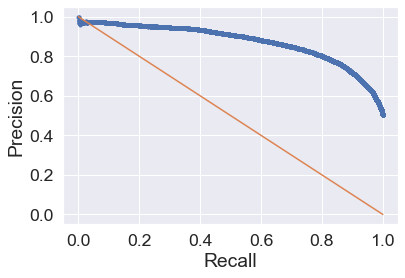

In [408]:
#Predict on train data
y_train_pred_xgb_best = best_xgb.predict(X_train_pca)
y_train_pred_xgb_best_prob = best_xgb.predict_proba(X_train_pca)[:,1] #Probability of churn class

#Metrics for train data
precision_xgb_best, recall_xgb_best, thresholds_xgb_best = precision_recall_curve(y_train_over, y_train_pred_xgb_best_prob)


print("\nAUC :",auc(recall_xgb_best,precision_xgb_best),"\n") #Area under curve
print("AUROC :",roc_auc_score(y_train_over, y_train_pred_xgb_best_prob),"\n")
print(confusion_matrix(y_train_over,y_train_pred_xgb_best))
print(classification_report(y_train_over,y_train_pred_xgb_best))


#Plot precision-recall curve
plt.plot(recall_xgb_best,precision_xgb_best,marker='.')
plt.plot([0,1], [1, 0]) #Unskilled model
plt.xlabel('Recall')
plt.ylabel('Precision')




AUC : 0.38806938613402553 

AUROC : 0.8347363179360714 

[[6677 1433]
 [ 193  483]]
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      8110
           1       0.25      0.71      0.37       676

    accuracy                           0.81      8786
   macro avg       0.61      0.77      0.63      8786
weighted avg       0.92      0.81      0.85      8786



Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

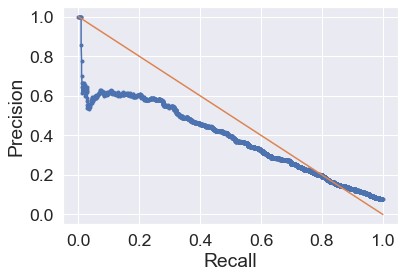

In [409]:
#Predict on test data
y_test_pred_xgb_best = best_xgb.predict(X_test_pca)
y_test_pred_xgb_best_prob = best_xgb.predict_proba(X_test_pca)[:,1] #Probability of churn class

#Metrics for test data
precision_xgb_best, recall_xgb_best, thresholds_xgb_best = precision_recall_curve(y_test, y_test_pred_xgb_best_prob)

print("\nAUC :",auc(recall_xgb_best,precision_xgb_best),"\n") #Area under curve
print("AUROC :",roc_auc_score(y_test, y_test_pred_xgb_best_prob),"\n")
print(confusion_matrix(y_test,y_test_pred_xgb_best))
print(classification_report(y_test,y_test_pred_xgb_best))


#Plot precision-recall curve
plt.plot(recall_xgb_best,precision_xgb_best,marker='.')
plt.plot([0,1], [1, 0]) #Unskilled model
plt.xlabel('Recall')
plt.ylabel('Precision')

>**Observation**: At at F1 score of 0.37, the tuned model is better than the one with default hyperparameters  however, it is not better than the best model so far i.e. Random Forest classifier with default hyperparameters.

<a id="4.5"></a>
## Model for Drivers Analysis

**Approach**:

The models created so far were focused on maximizing predictive power and often used PCA components which makes them difficult to interpret. Before we can make business recommdations we need to identify the most important drivers/attributes likely to influence churn using interpretable models. 

Let's use the best performing algorithm (so far) Random Forest with default hyperparameters but using all 16 predictor variables instead of PCA components in order to identify the most important drivers of churn and present these to business stakeholders. 

The RF classifier assigns an importance score to each feature. Let's use this score to identify the top drivers for presentation to the Telco's management team.

This final model will also be assessed for F1 performance.

In [327]:
#Let's build a train set with all 16 parameters but non-scaled and with balanced classes.
X_train_dt,y_train_dt = over_sampler.fit_sample(X_train_notscaled, y_train) 
X_train_dt = pd.DataFrame(X_train_dt,columns=X_train_notscaled.columns)

In [328]:
# model with optimal hyperparameters
clf_dt_final = RandomForestClassifier(random_state=100)

clf_dt_final.fit(X_train_dt,y_train_dt)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)


AUC : 0.9999599003588528 

AUROC : 0.9999599139777532 

[[18888    35]
 [   66 18857]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18923
           1       1.00      1.00      1.00     18923

    accuracy                           1.00     37846
   macro avg       1.00      1.00      1.00     37846
weighted avg       1.00      1.00      1.00     37846



Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

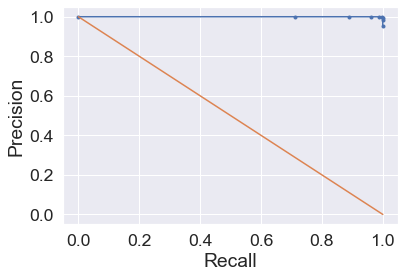

In [329]:
#Predict on train data
y_train_preddt_final = clf_dt_final.predict(X_train_dt)
y_train_preddt_final_prob = clf_dt_final.predict_proba(X_train_dt)[:,1] #Probability of churn class

#Metrics for train data
precisiondt_final, recalldt_final, thresholdsdt_final = precision_recall_curve(y_train_dt, y_train_preddt_final_prob)


print("\nAUC :",auc(recalldt_final,precisiondt_final),"\n") #Area under curve
print("AUROC :",roc_auc_score(y_train_dt, y_train_preddt_final_prob),"\n")
print(confusion_matrix(y_train_dt,y_train_preddt_final))
print(classification_report(y_train_dt,y_train_preddt_final))


#Plot precision-recall curve
plt.plot(recalldt_final,precisiondt_final,marker='.')
plt.plot([0,1], [1, 0]) #Unskilled model
plt.xlabel('Recall')
plt.ylabel('Precision')


AUC : 0.4002718981757683 

AUROC : 0.8374358852756842 

[[7624  486]
 [ 334  342]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      8110
           1       0.41      0.51      0.45       676

    accuracy                           0.91      8786
   macro avg       0.69      0.72      0.70      8786
weighted avg       0.92      0.91      0.91      8786



Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

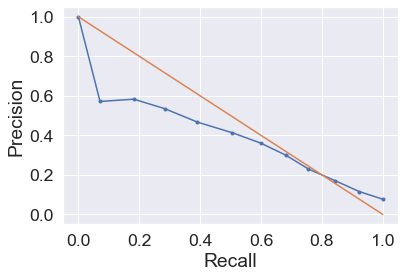

In [330]:
#Predict on test data
y_test_preddt_final = clf_dt_final.predict(X_test_notscaled)
y_test_preddt_final_prob = clf_dt_final.predict_proba(X_test_notscaled)[:,1] #Probability of churn class

#Metrics for test data
precisiondt_final, recalldt_final, thresholdsdt_final = precision_recall_curve(y_test, y_test_preddt_final_prob)

print("\nAUC :",auc(recalldt_final,precisiondt_final),"\n") #Area under curve
print("AUROC :",roc_auc_score(y_test, y_test_preddt_final_prob),"\n")
print(confusion_matrix(y_test,y_test_preddt_final))
print(classification_report(y_test,y_test_preddt_final))


#Plot precision-recall curve
plt.plot(recalldt_final,precisiondt_final,marker='.')
plt.plot([0,1], [1, 0]) #Unskilled model
plt.xlabel('Recall')
plt.ylabel('Precision')

> **Observation & Action**: **This is the best performing model with F1 score of 0.45!** Let's now identify the most important features and generate a score.

In [363]:
#Get importance of features from RF model
imp_features = pd.DataFrame()
imp_features['Attributes'] = X_train_dt.columns
imp_features['RF_Score'] = clf_dt_final.feature_importances_

imp_features = imp_features.sort_values(by='RF_Score',ascending=False)
imp_features

,Attributes,RF_Score
8,loc_ic_t2m_mou_ga,0.2296
3,offnet_mou_ga,0.1034
1,days_rech_ga,0.0924
15,std_og_t2t_mou_ga,0.0757
5,loc_og_t2m_mou_ga,0.0660
2,onnet_mou_ga,0.0558
0,aon,0.0532
7,loc_ic_t2t_mou_ga,0.0420
6,std_og_t2m_mou_ga,0.0414
11,total_rech_num_ga,0.0407


In [391]:
#Prepare data for presentation

#Top 7 drivers only
drivers = imp_features[:7] 

#Set index
drivers.set_index('Attributes',inplace=True)

In [392]:
#Increase in Age on Network decreases churn so let's present so it can be easily interpreted
drivers.loc['aon'] = drivers.loc['aon']*(-1)

#Rename attributes
drivers.rename(index={"loc_ic_t2m_mou_ga": "Drop in Local Incoming T2T", "days_rech_ga": "Duration between recharges",
                        "offnet_mou_ga": "Drop in Off Network calls", "std_og_t2t_mou_ga": "Drop in STD Outgoing T2T",
                        "loc_og_t2m_mou_ga": "Drop in Local Outgoing T2M", "onnet_mou_ga": "Drop in On Network calls",
                        "aon": "Age on network"},inplace=True)



#Change scale for ease of interpreation
# drivers.RF_Score = drivers.RF_Score*100

drivers = drivers.sort_values(by='RF_Score',ascending=False)
drivers


/Users/ksami/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/ksami/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ksami/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,RF_Score
Attributes,
Drop in Local Incoming T2T,0.2296
Drop in Off Network calls,0.1034
Duration between recharges,0.0924
Drop in STD Outgoing T2T,0.0757
Drop in Local Outgoing T2M,0.0660
Drop in On Network calls,0.0558
Age on network,-0.0532


<Figure size 864x720 with 0 Axes>

Text(0.5, 0.98, 'Top Drivers of Churn')

Text(0.5, 0, 'Impact on Churn')

Text(0, 0.5, 'Drivers')

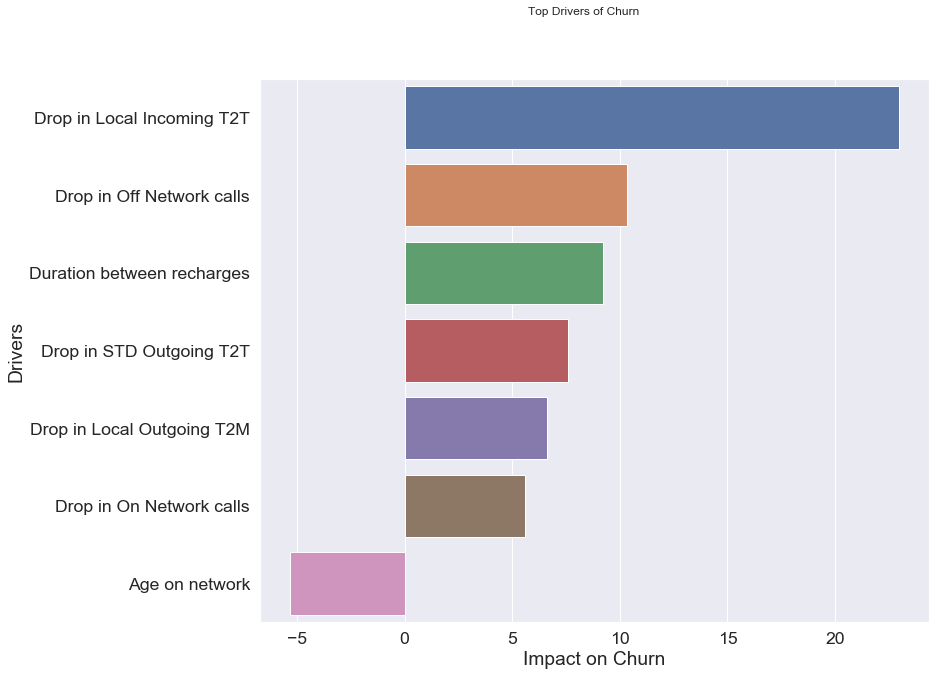

In [393]:
# Plot graph for presentation

plt.figure(figsize=(12,10))
sns.barplot(drivers.RF_Score*100, drivers.index, orient='h') 
plt.suptitle('Top Drivers of Churn')
plt.xlabel('Impact on Churn')
plt.ylabel('Drivers')
plt.show()

> **Note**: The top 7 drivers influencing Churn are identified above. This can be used for presentation to the Telco's management.

<a id="4.6"></a>
## Conclusion on Modelling

The best performing model is a Random Forests model with F1 score of 0.44. It balances Precision and Recall very well with a Precision of 0.41 and Recall of 0.51.

The key hyperparameters of this best Random Forests model are:
- Function to measure quality of split (criterion) = gini
- No. of trees in the forest (n_estimators) =10
- The number of features considered at each split (max_features) = auto

There is a possibility to improve performance of models like Decision Trees, Random Forests & XGBoostby doing more fine-grained hyperparameter tuning but these can be computationally intensive.

The top drivers of churn were identified as well and included below in a business-friendly presentation.

<a id="5"></a>
# Business Recommendations

<a id="5.1"></a>
## Drivers of Churn 

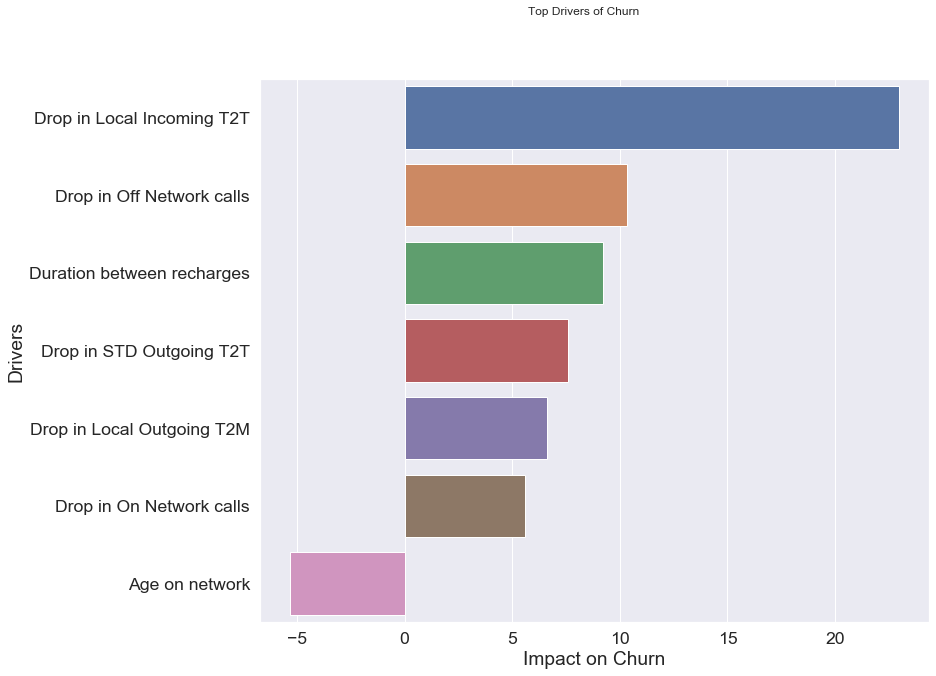

**Brief Explanation of Graph**: 
Each bar represents a factor affecting churn. The ones pointing to the right increase the odds of a customer chruning whereas the one to the left decreases the odds of a customer churning. Ideally, you want to pull everything to the left to minimize churn.

<a id="5.2"></a>
## Recommendations

Following are some recommendations to decrease the churn rate:

- **Age on Network**: Customers that have been with the Telecom for longer are less likely to leave. Therefore, plans and offers that incentivize long-term commitments could reduce odds of a customer churning.

- **Number of times recharged**: A drop in the typical number of times a customer recharges each month indicates that a customer may churn.An incentive should be provided such as free surprise coupons for each new recharge done to encourage customers to recharge more often; this mcan be offered specifically to customers that may churn.

- **Drop in utilization**: Customers should be monitored for a decrease in utilization of the top services seen above such as Local Incoming T2T etc. and a targeted offer should be made for the particular service where there is a drop to encourage its utilization.

<a id="6"></a>
# References
Articles I referred to understand the Telecom domain

- https://dazeinfo.com/2017/09/12/mobile-data-consumption-india-ericsson-report/
- https://dazeinfo.com/2019/10/08/mobile-data-usage-in-india-by-year-graphfarm/

The End